In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [1]:
#The bump from zero images problem

In [3]:
data = np.load("/fastio2/dasha/double_pulse/data_rr_NuTau_1_1_.npy")

In [6]:
print(len(data[data["im_sum"][:,0]==0])/len(data)*100)
print(len(data[data["im_sum"][:,1]==0])/len(data)*100)
print(len(data[data["im_sum"][:,2]==0])/len(data)*100)
    

0.06938056408737274
0.665741592478835
1.0898205460016526


In [12]:
cut1=0.56
cut2=0.6
mask = (cut1 <= data['preds']['n4']) & (data['preds']['n4'] <= cut2) & (cut1 <= data['preds']['n1']) & (data['preds']['n1'] <= cut2)
print(data.shape,mask.shape)

(128278,) (128278,)


In [13]:
print(len(data[mask][data[mask]["im_sum"][:,0]==0])/len(data[mask])*100)
print(len(data[mask][data[mask]["im_sum"][:,1]==0])/len(data[mask])*100)
print(len(data[mask][data[mask]["im_sum"][:,2]==0])/len(data[mask])*100)
    

9.135802469135802
10.617283950617285
10.617283950617285


In [16]:
print(len(data[mask][data[mask]["im_sum"][:,0]==0])/len(data[data["im_sum"][:,0]==0])*100)
print(len(data[mask][data[mask]["im_sum"][:,1]==0])/len(data[data["im_sum"][:,0]==0])*100)
print(len(data[mask][data[mask]["im_sum"][:,2]==0])/len(data[data["im_sum"][:,0]==0])*100)
    

41.57303370786517
48.31460674157304
48.31460674157304


In [83]:
def Plot(Name,Label,data_t,data_m,data_e,xscale='linear',b =100,r =[0,1000], loc = 8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    weights_t = np.ones(data_t.shape[0])/data_t.shape[0]
    weights_m = np.ones(data_m.shape[0])/data_m.shape[0]
    weights_e = np.ones(data_e.shape[0])/data_e.shape[0]

    #ax.set_xscale(xscale)
    #ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.74,'#EventsT '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.84,'#EventsM '+str(len(data_m)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.94,'#EventsE '+str(len(data_e)), transform=ax.transAxes, color = "black",fontsize=12)

    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_t, bins =b, weights = weights_t, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_m, bins =b, weights = weights_m, histtype = 'step',edgecolor ='b', lw =2, range =r, label = "NuMuCC")  
    ax.hist(data_e, bins =b, weights = weights_e, histtype = 'step',edgecolor ='g', lw =2, range =r, label = "NuECC")  
   
    plt.legend()
    plt.show()


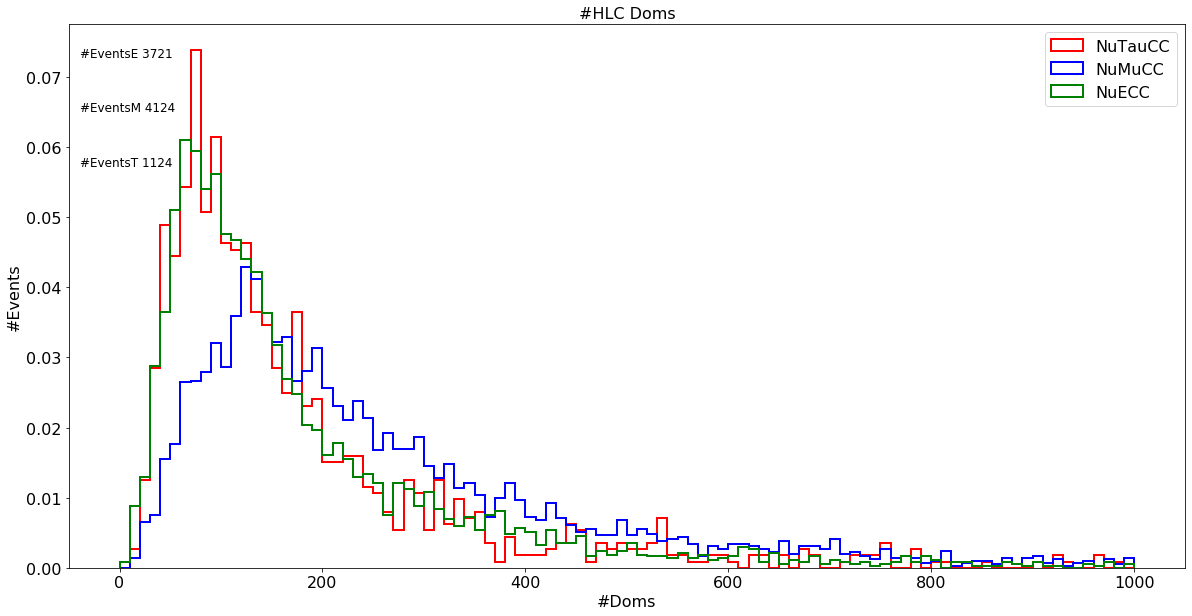

In [85]:
Plot("#HLC Doms","#Doms",data_t['hlc'][:,0],data_m['hlc'][:,0],data_e['hlc'][:,0])

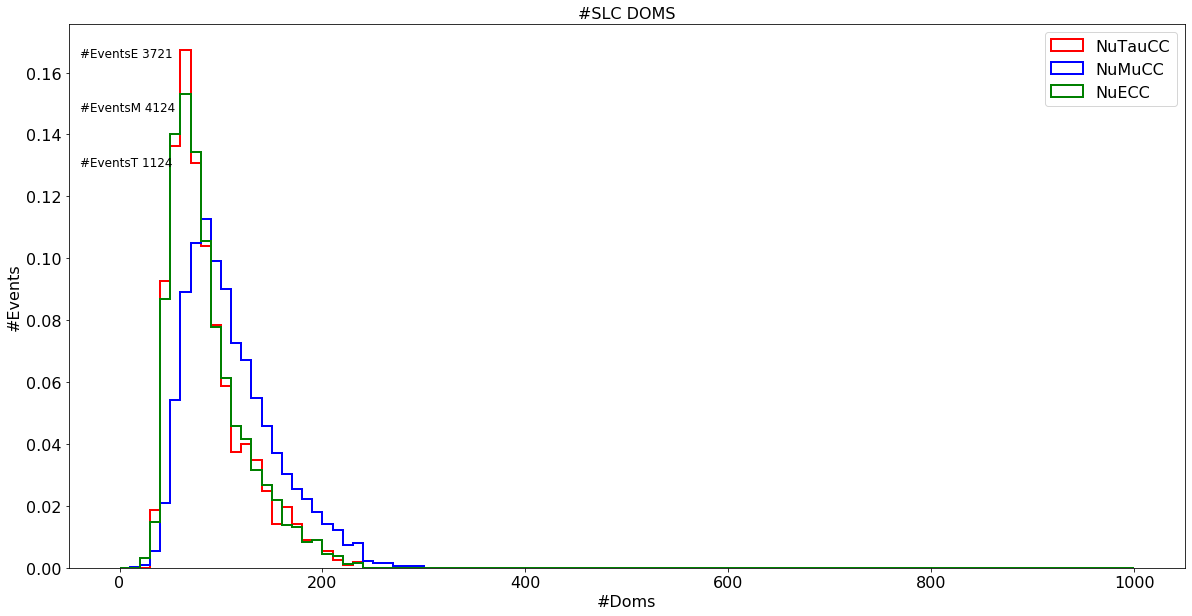

In [86]:
Plot("#SLC DOMS","#Doms",data_t['slc'][:,0],data_m['slc'][:,0],data_e['slc'][:,0])

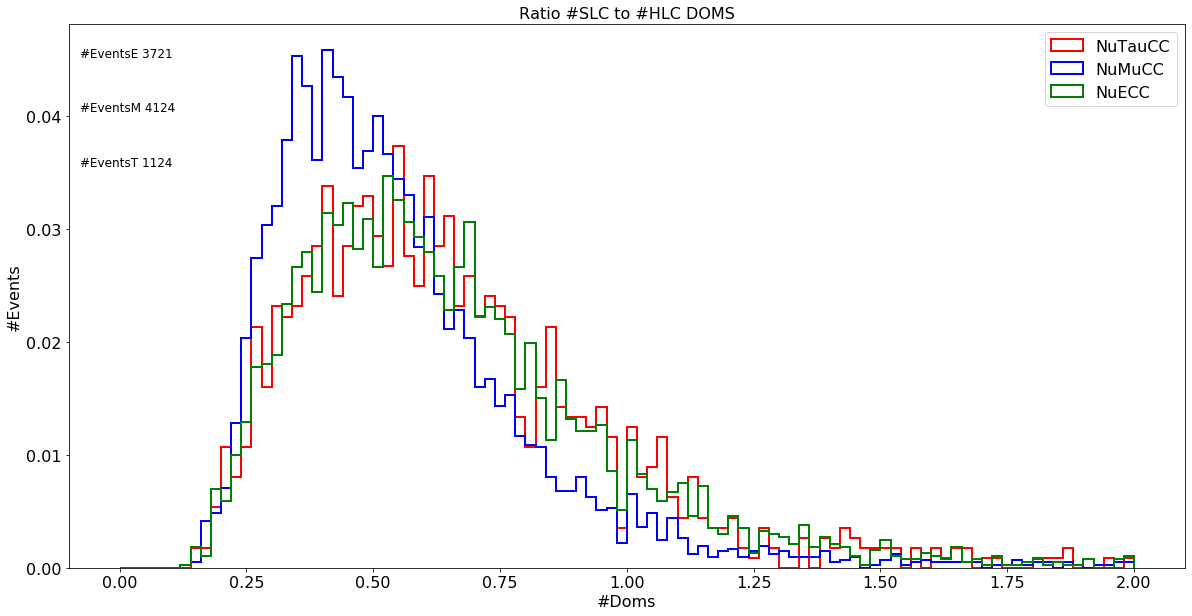

In [90]:
Plot("Ratio #SLC to #HLC DOMS","#Doms",data_t['slc'][:,0]/data_t['hlc'][:,0],data_m['slc'][:,0]/data_m['hlc'][:,0],data_e['slc'][:,0]/data_e['hlc'][:,0], r=[0,2])

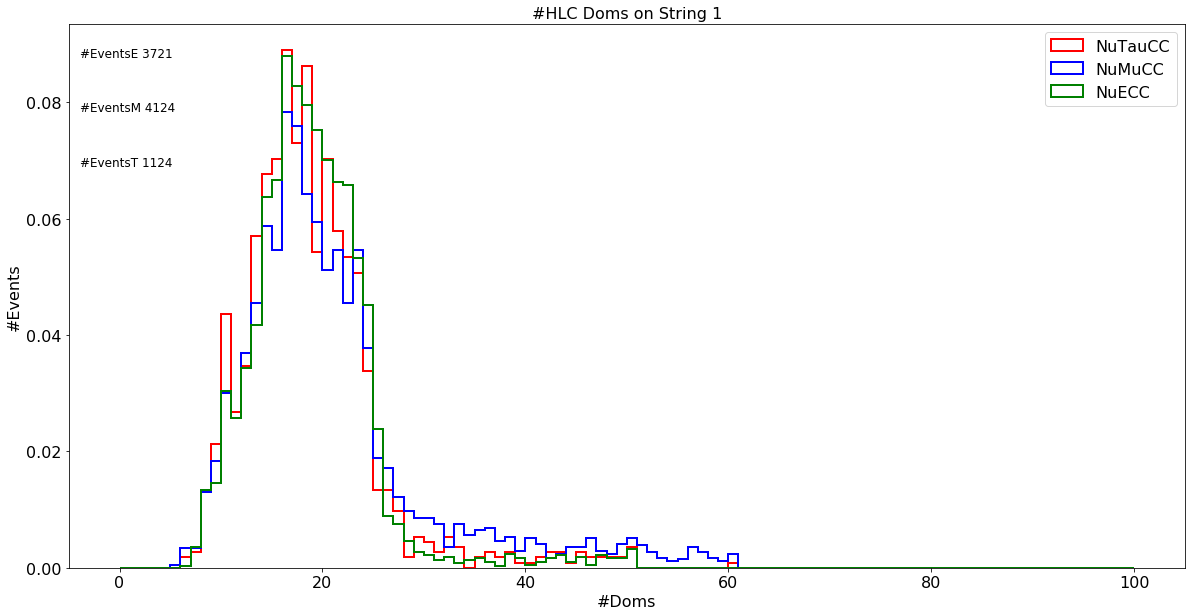

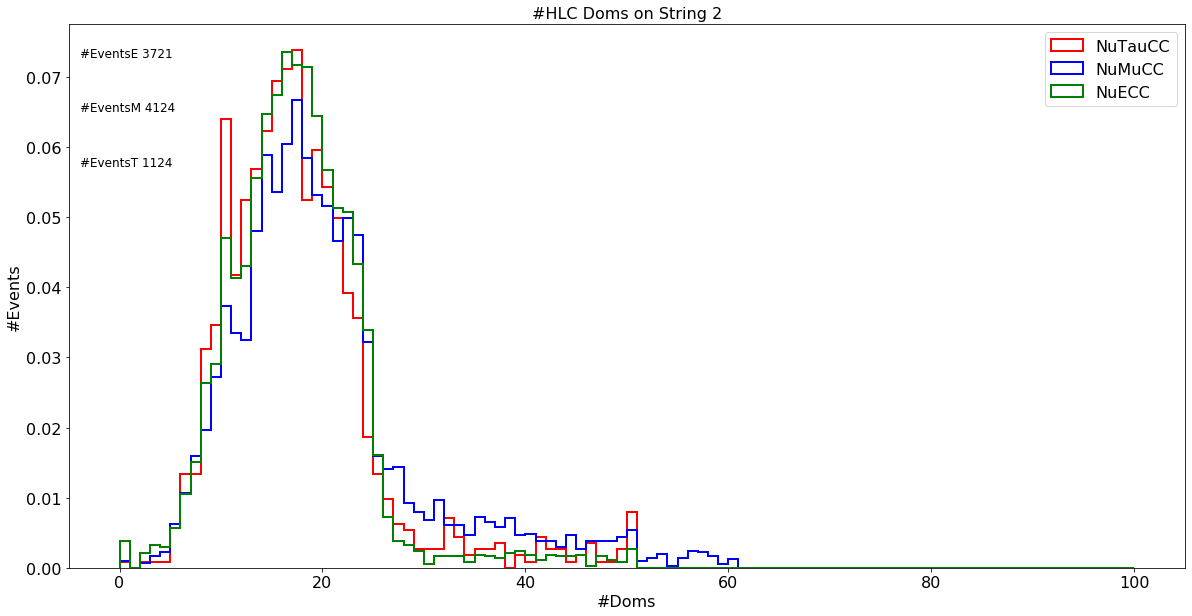

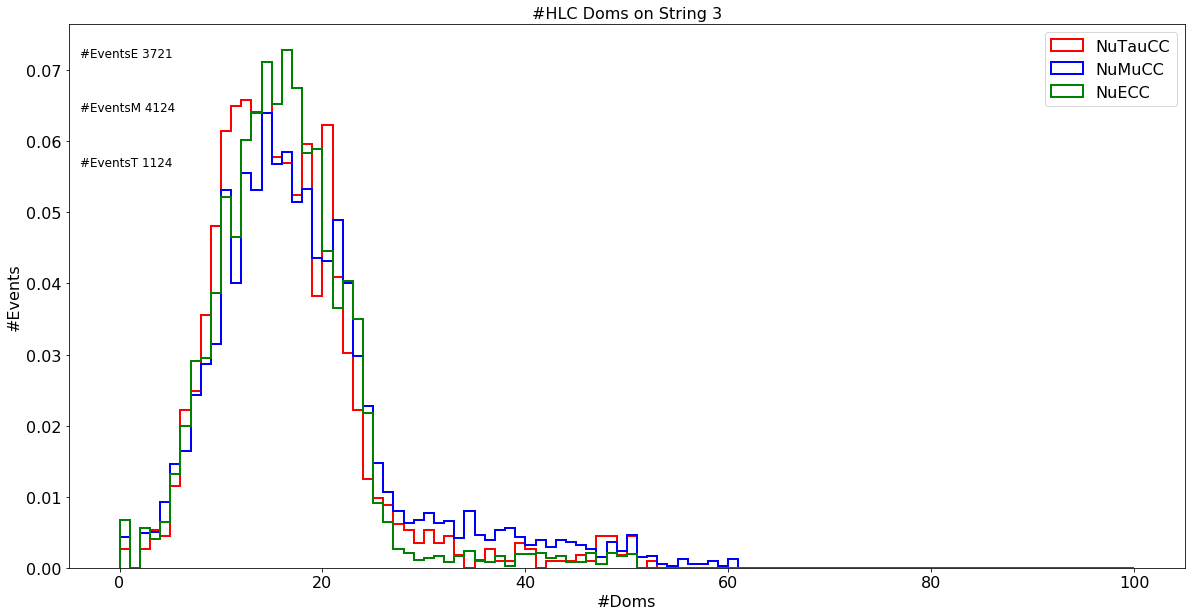

In [102]:
Plot("#HLC Doms on String 1","#Doms",data_t['st_hlc'][:,0,0],data_m['st_hlc'][:,0,0],data_e['st_hlc'][:,0,0],r=[0,100])
Plot("#HLC Doms on String 2","#Doms",data_t['st_hlc'][:,0,1],data_m['st_hlc'][:,0,1],data_e['st_hlc'][:,0,1],r=[0,100])
Plot("#HLC Doms on String 3","#Doms",data_t['st_hlc'][:,0,2],data_m['st_hlc'][:,0,2],data_e['st_hlc'][:,0,2],r=[0,100])

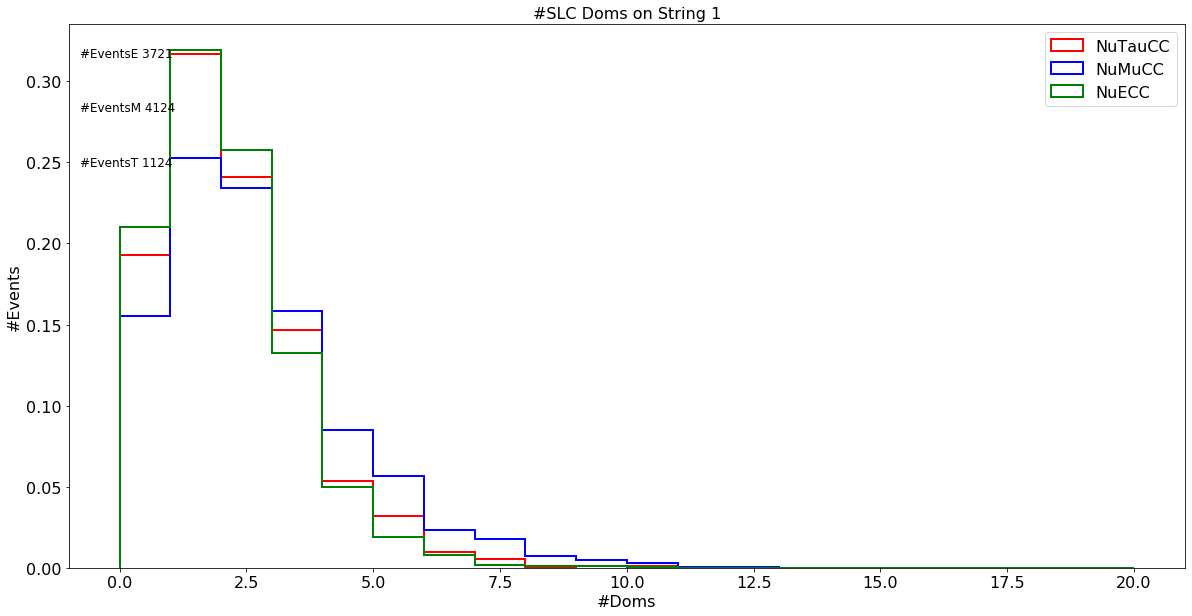

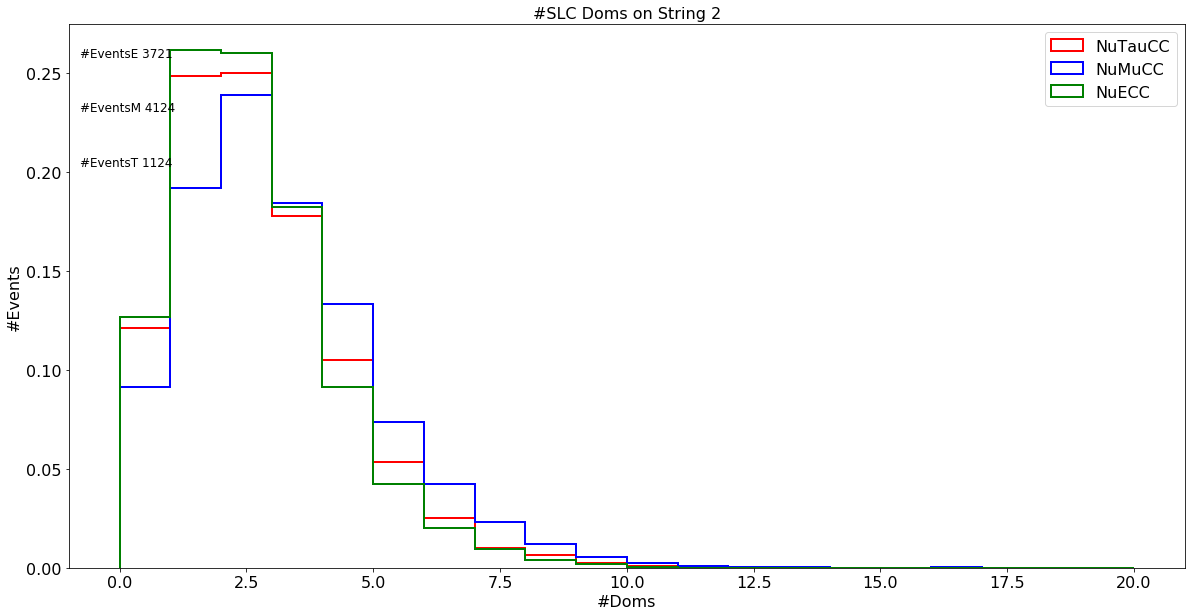

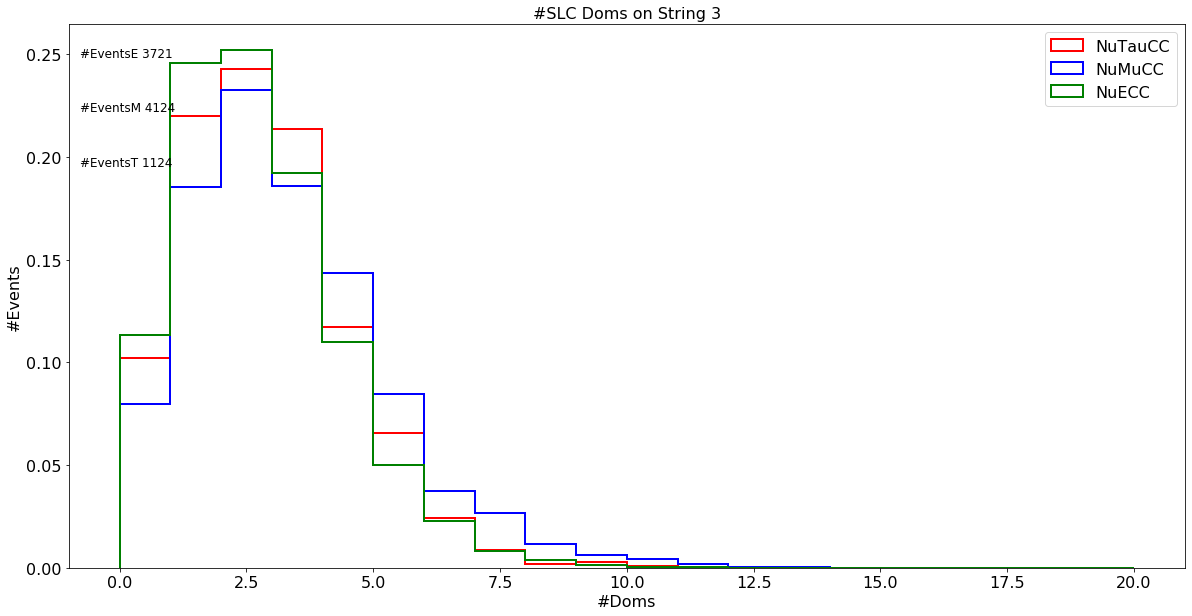

In [101]:
Plot("#SLC Doms on String 1","#Doms",data_t['st_slc'][:,0,0],data_m['st_slc'][:,0,0],data_e['st_slc'][:,0,0],r=[0,20],b=20)
Plot("#SLC Doms on String 2","#Doms",data_t['st_slc'][:,0,1],data_m['st_slc'][:,0,1],data_e['st_slc'][:,0,1],r=[0,20],b=20)
Plot("#SLC Doms on String 3","#Doms",data_t['st_slc'][:,0,2],data_m['st_slc'][:,0,2],data_e['st_slc'][:,0,2],r=[0,20],b=20)

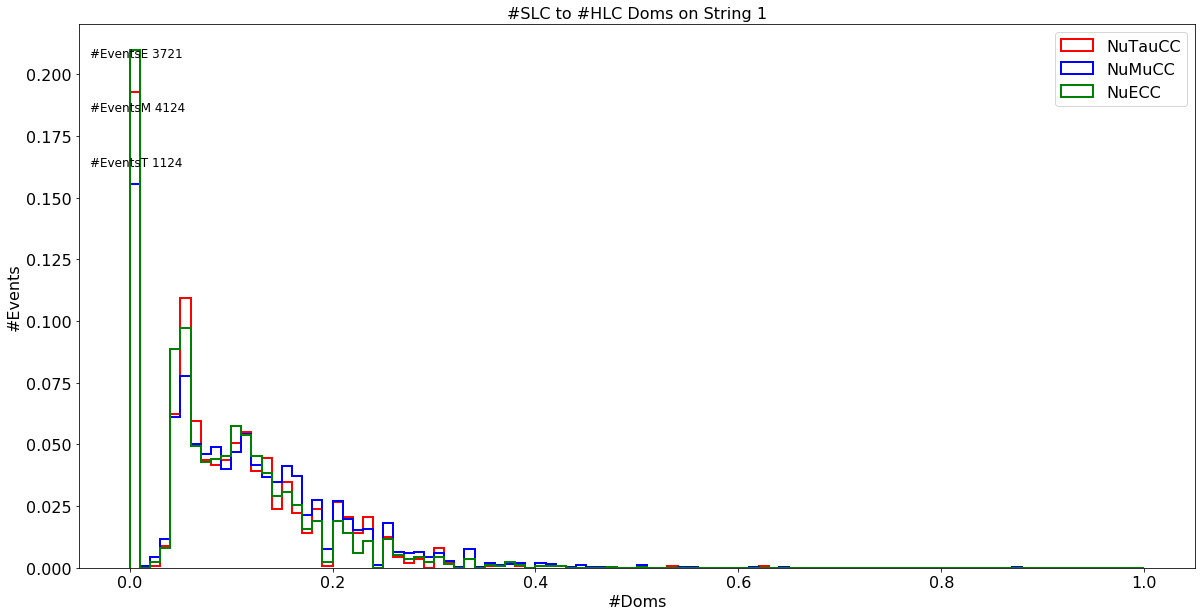

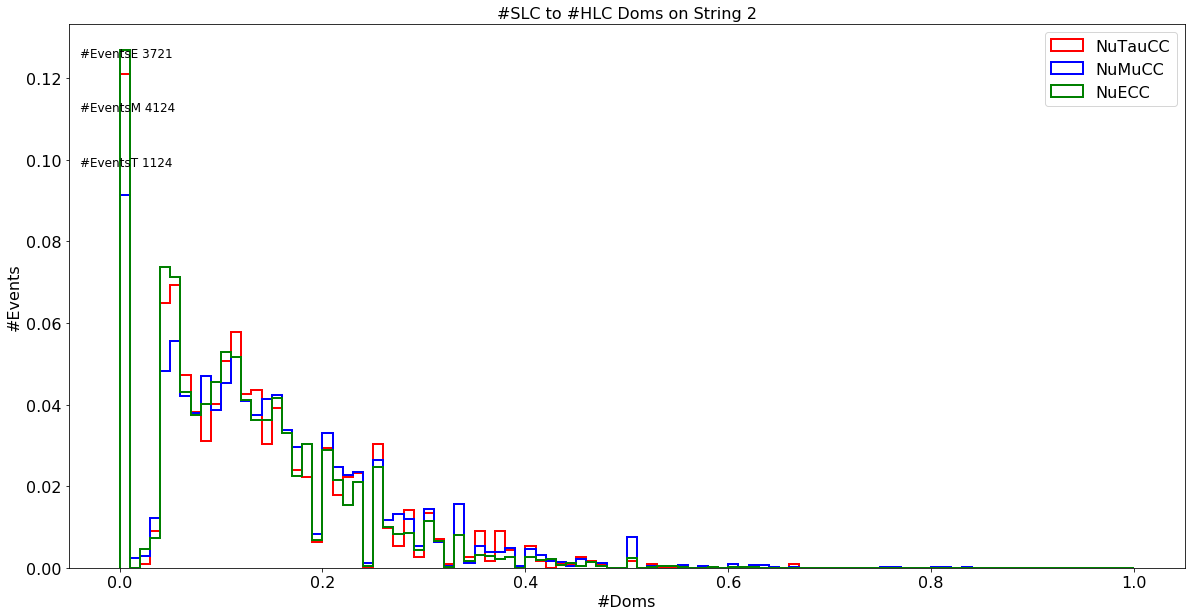

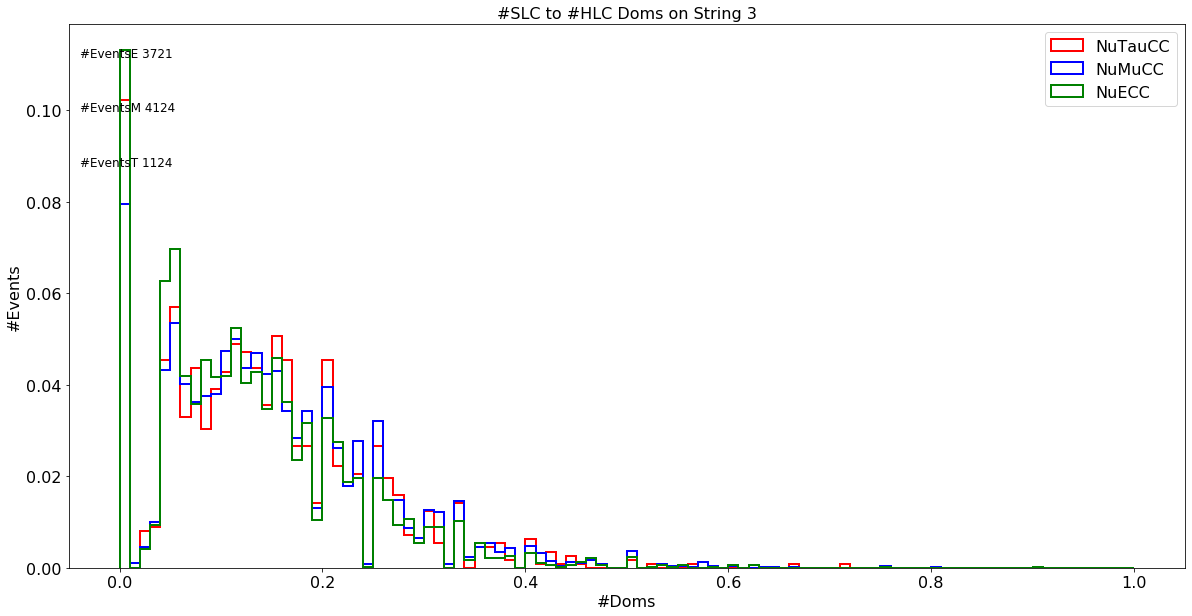

In [105]:
Plot("#SLC to #HLC Doms on String 1","#Doms",data_t['st_slc'][:,0,0]/data_t['st_hlc'][:,0,0],data_m['st_slc'][:,0,0]/data_m['st_hlc'][:,0,0],data_e['st_slc'][:,0,0]/data_e['st_hlc'][:,0,0],r=[0,1],b=100)
Plot("#SLC to #HLC Doms on String 2","#Doms",data_t['st_slc'][:,0,1]/data_t['st_hlc'][:,0,0],data_m['st_slc'][:,0,1]/data_m['st_hlc'][:,0,0],data_e['st_slc'][:,0,1]/data_e['st_hlc'][:,0,0],r=[0,1],b=100)
Plot("#SLC to #HLC Doms on String 3","#Doms",data_t['st_slc'][:,0,2]/data_t['st_hlc'][:,0,0],data_m['st_slc'][:,0,2]/data_m['st_hlc'][:,0,0],data_e['st_slc'][:,0,2]/data_e['st_hlc'][:,0,0],r=[0,1],b=100)

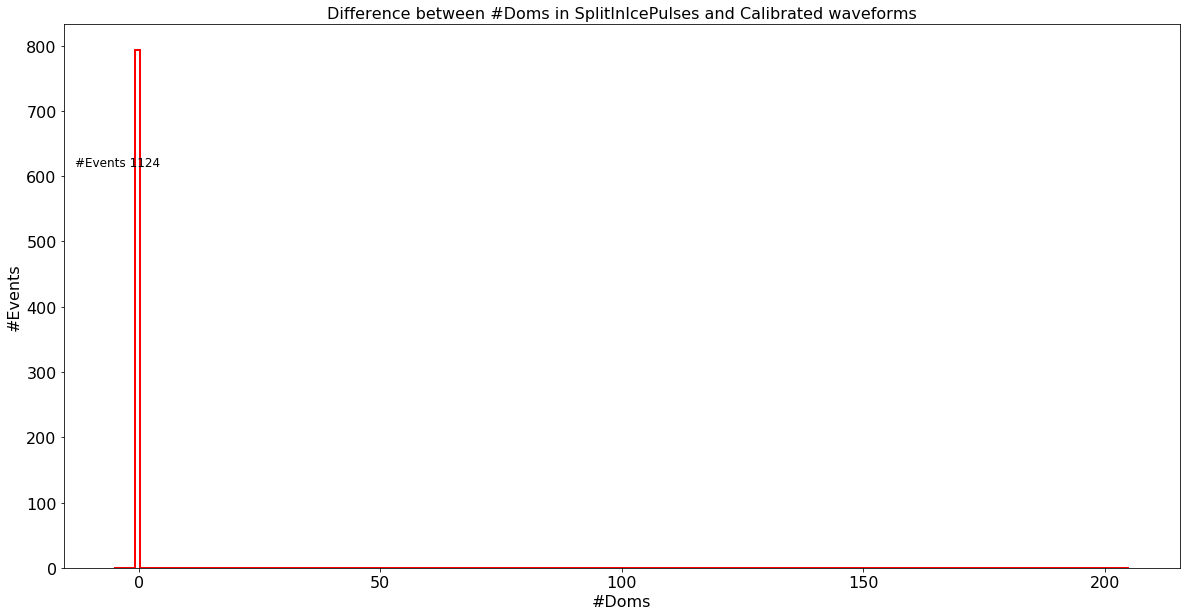

In [17]:
Plot("Difference between #Doms in SplitInIcePulses and Calibrated waveforms","#Doms",(data['pulses']-data['cal']).flatten(),r=[-5,205],b=200)

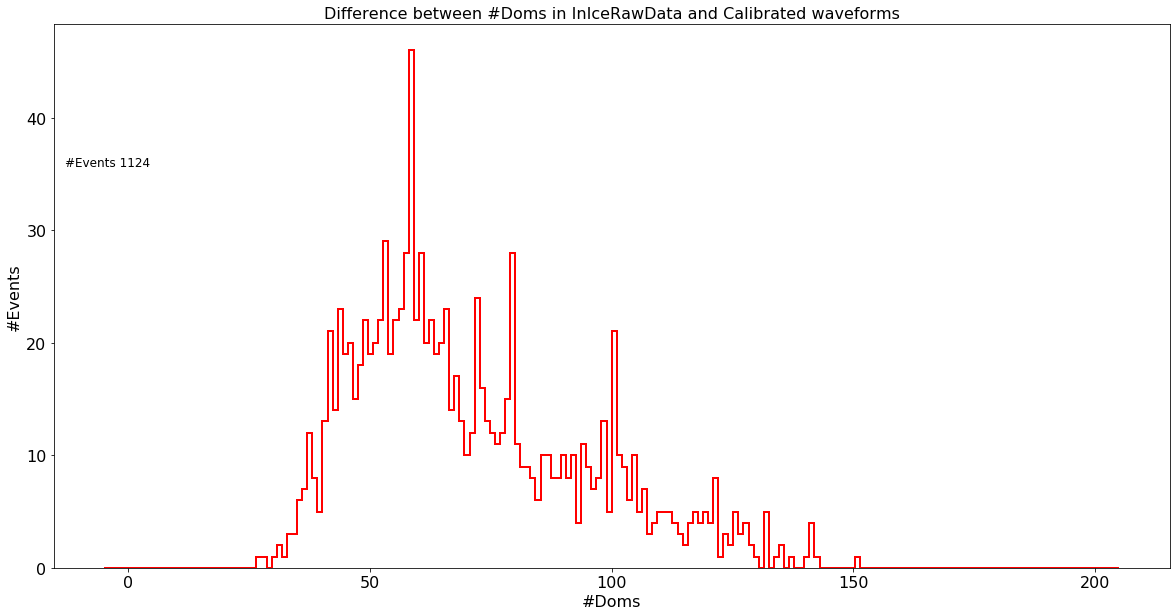

In [29]:
Plot("Difference between #Doms in InIceRawData and Calibrated waveforms","#Doms",data[:,1]-data[:,2],r=[-5,205],b=200)

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


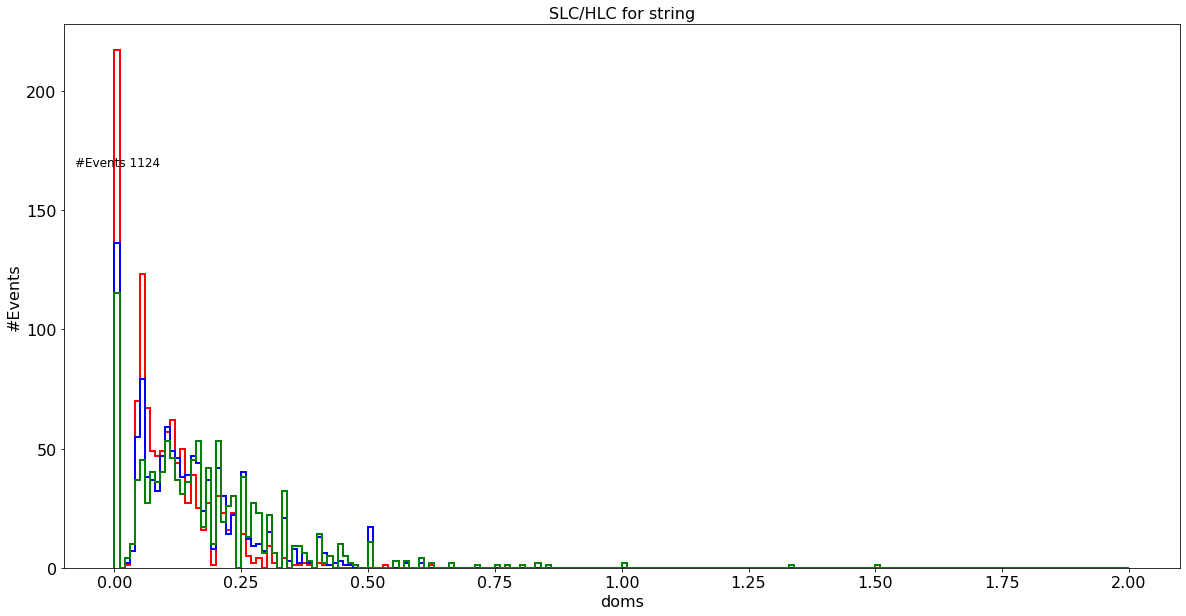

In [40]:
fig = plt.figure(figsize=(20, 10),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#ax.set_xscale('')
#ax.set_yscale('log')
ax.set_title("SLC/HLC for string", fontsize = 16)
ax.text(0.01,0.74,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
r =[0,2]
b=200
ax.set_xlabel('doms', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data['st_slc'][:,0,0]/data['st_hlc'][:,0,0], bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "String_1")  
ax.hist(data['st_slc'][:,0,1]/data['st_hlc'][:,0,1], bins =b, histtype = 'step',edgecolor ='b', lw =2, range =r, label = "String_2")  
ax.hist(data['st_slc'][:,0,2]/data['st_hlc'][:,0,2], bins =b, histtype = 'step',edgecolor ='g', lw =2, range =r, label = "String_3")  

#plt.legend(loc=loc)
plt.show()

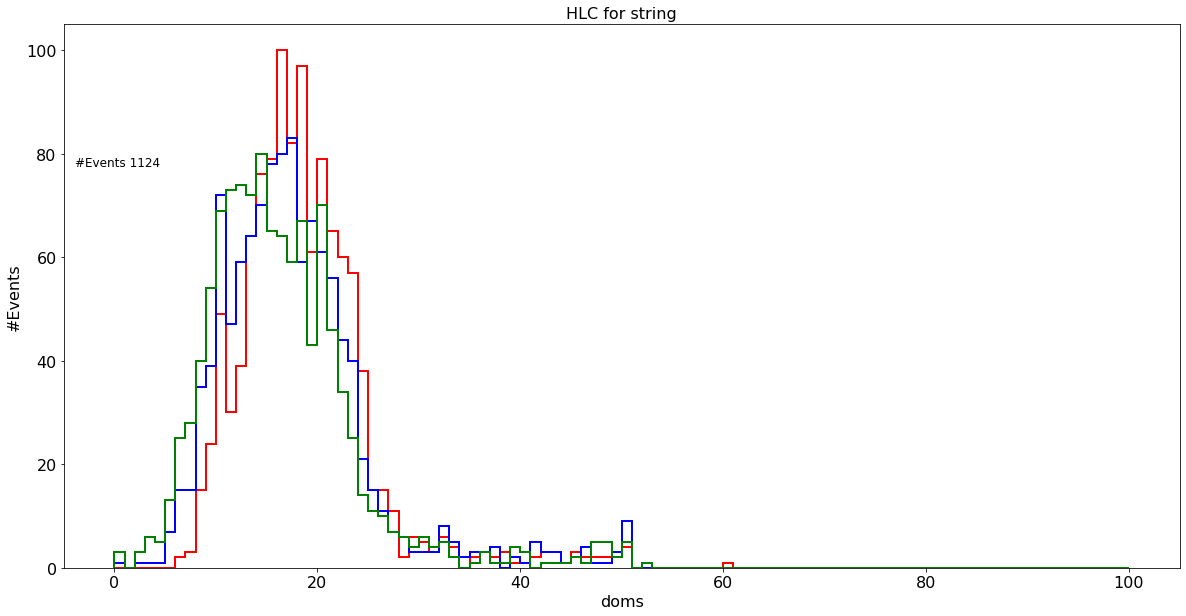

In [37]:
fig = plt.figure(figsize=(20, 10),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#ax.set_xscale('')
#ax.set_yscale('log')
ax.set_title("HLC for string", fontsize = 16)
ax.text(0.01,0.74,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
r =[0,100]
b=100
ax.set_xlabel('doms', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data['st_hlc'][:,0,0], bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "String_1")  
ax.hist(data['st_hlc'][:,0,1], bins =b, histtype = 'step',edgecolor ='b', lw =2, range =r, label = "String_2")  
ax.hist(data['st_hlc'][:,0,2], bins =b, histtype = 'step',edgecolor ='g', lw =2, range =r, label = "String_3")  

#plt.legend(loc=loc)
plt.show()

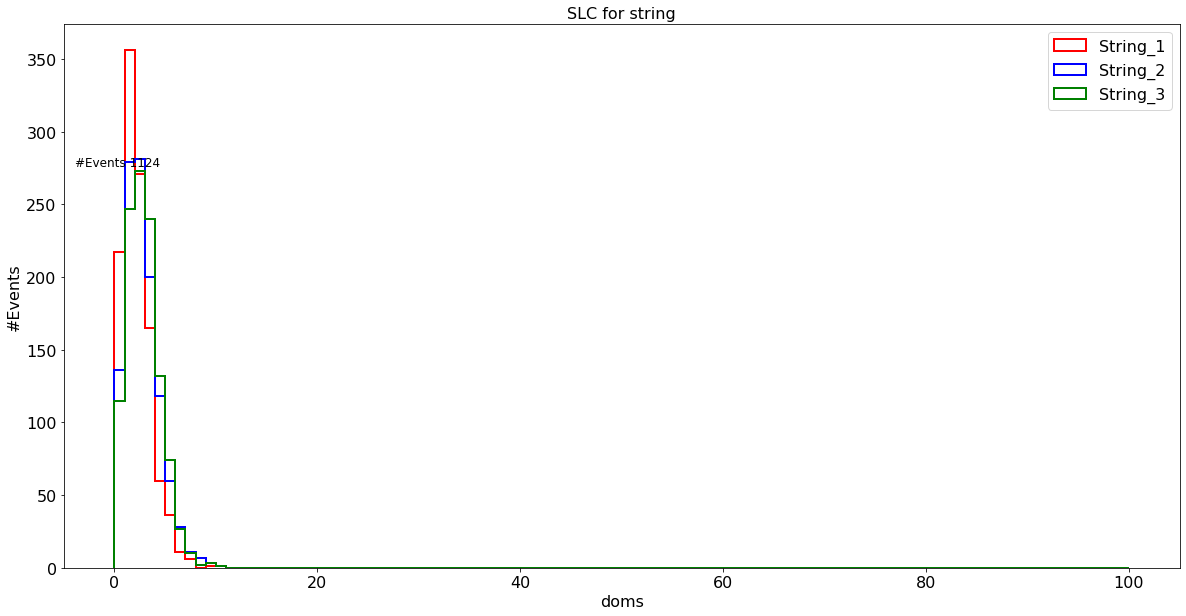

In [46]:
fig = plt.figure(figsize=(20, 10),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#ax.set_xscale('')
#ax.set_yscale('log')
ax.set_title("SLC for string", fontsize = 16)
ax.text(0.01,0.74,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
r =[0,100]
b=100
ax.set_xlabel('doms', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data['st_slc'][:,0,0], bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "String_1")  
ax.hist(data['st_slc'][:,0,1], bins =b, histtype = 'step',edgecolor ='b', lw =2, range =r, label = "String_2")  
ax.hist(data['st_slc'][:,0,2], bins =b, histtype = 'step',edgecolor ='g', lw =2, range =r, label = "String_3")  

plt.legend()
plt.show()

In [433]:
data2 = np.load("/fastio2/dasha/double_pulse/data_BUMP_NuTau_1_1_.npy")
data3 = np.load("/fastio2/dasha/double_pulse/data_BUMP3_NuTau_1_1_.npy")

In [352]:
mask2 = data2['preds']['n4']  

In [465]:
cut1=0.5
cut2=0.7
mask2 = (cut1 <= data2['preds']['n4']) & (data2['preds']['n4'] <= cut2) & (cut1 <= data2['preds']['n1']) & (data2['preds']['n1'] <= cut2)
mask3 = (cut1 <= data3['preds']['n4']) & (data3['preds']['n4'] <= cut2) & (cut1 <= data3['preds']['n1']) & (data3['preds']['n1'] <= cut2)

print(data2.shape,mask2.shape)
print(data3.shape,mask3.shape)
print((data3.shape[0]/data2.shape[0])*100)

(256460,) (256460,)
(252768,) (252768,)
98.5603992825392


In [391]:
print(len(data2[data2["im_sum"][:,0]==0])/len(data2)*100)
print(len(data2[data2["im_sum"][:,1]==0])/len(data2)*100)
print(len(data2[data2["im_sum"][:,2]==0])/len(data2)*100)

print(len(data3[data3["im_sum"][:,0]==0])/len(data3)*100)
print(len(data3[data3["im_sum"][:,1]==0])/len(data3)*100)
print(len(data3[data3["im_sum"][:,2]==0])/len(data3)*100)


0.2405833268345941
0.8601731264134758
1.2883100678468378
0.0
0.0
0.0


In [392]:
print(len(data2[mask2][data2[mask2]["im_sum"][:,0]==0])/len(data2[mask2])*100)
print(len(data2[mask2][data2[mask2]["im_sum"][:,1]==0])/len(data2[mask2])*100)
print(len(data2[mask2][data2[mask2]["im_sum"][:,2]==0])/len(data2[mask2])*100)

print(len(data3[mask3][data3[mask3]["im_sum"][:,0]==0])/len(data3[mask3])*100)
print(len(data3[mask3][data3[mask3]["im_sum"][:,1]==0])/len(data3[mask3])*100)
print(len(data3[mask3][data3[mask3]["im_sum"][:,2]==0])/len(data3[mask3])*100)


32.021347565043364
27.15143428952635
28.418945963975982
0.0
0.0
0.0


In [393]:
print(len(data2[mask2][data2[mask2]["im_sum"][:,0]==0])/len(data2[data2["im_sum"][:,0]==0])*100)
print(len(data2[mask2][data2[mask2]["im_sum"][:,1]==0])/len(data2[data2["im_sum"][:,0]==0])*100)
print(len(data2[mask2][data2[mask2]["im_sum"][:,2]==0])/len(data2[data2["im_sum"][:,0]==0])*100)
    

77.79578606158833
65.96434359805511
69.04376012965965


In [394]:
mask_i0 = data2["im_sum"][:,0]==0 
mask_i1 = data2["im_sum"][:,1]==0 
mask_i2 = data2["im_sum"][:,2]==0 
mask_i01 = mask_i0 & mask_i1 
mask_i12 = mask_i2 & mask_i1 
mask_i02 = mask_i0 & mask_i2 
mask_i012 = mask_i0 | mask_i1 | mask_i2 

In [395]:
print(len(data2[mask_i0])/len(data2[mask_i012])*100)
print(len(data2[mask_i1])/len(data2[mask_i012])*100)
print(len(data2[mask_i2])/len(data2[mask_i012])*100)

print(len(data2[mask_i01])/len(data2[mask_i012])*100)
print(len(data2[mask_i12])/len(data2[mask_i012])*100)
print(len(data2[mask_i02])/len(data2[mask_i012])*100)
print(len(data2[mask_i012])/len(data2[mask_i012])*100)


14.957575757575759
53.478787878787884
80.0969696969697
7.078787878787879
34.981818181818184
6.472727272727273
100.0


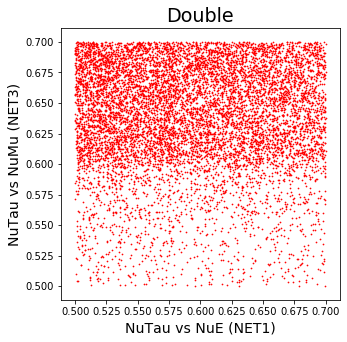

In [469]:
fig, ax = plt.subplots(figsize=(5,5),facecolor ='w')
plt.title('Network scores without empty events', fontdict={'fontsize': 14, 'fontweight': 'medium'})

#ax.set_xlim(l1)
#ax.set_ylim(l1)
ax.set_title('Double')
plt.scatter(data3['preds']['n1'][mask3],data3['preds']['n4'][mask3], c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.show()

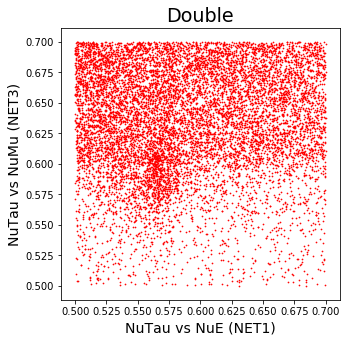

In [470]:
fig, ax = plt.subplots(figsize=(5,5),facecolor ='w')
plt.title('Network scores without empty events', fontdict={'fontsize': 14, 'fontweight': 'medium'})

#ax.set_xlim(l1)
#ax.set_ylim(l1)
ax.set_title('Double')
plt.scatter(data2['preds']['n1'][mask2],data2['preds']['n4'][mask2], c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.show()

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


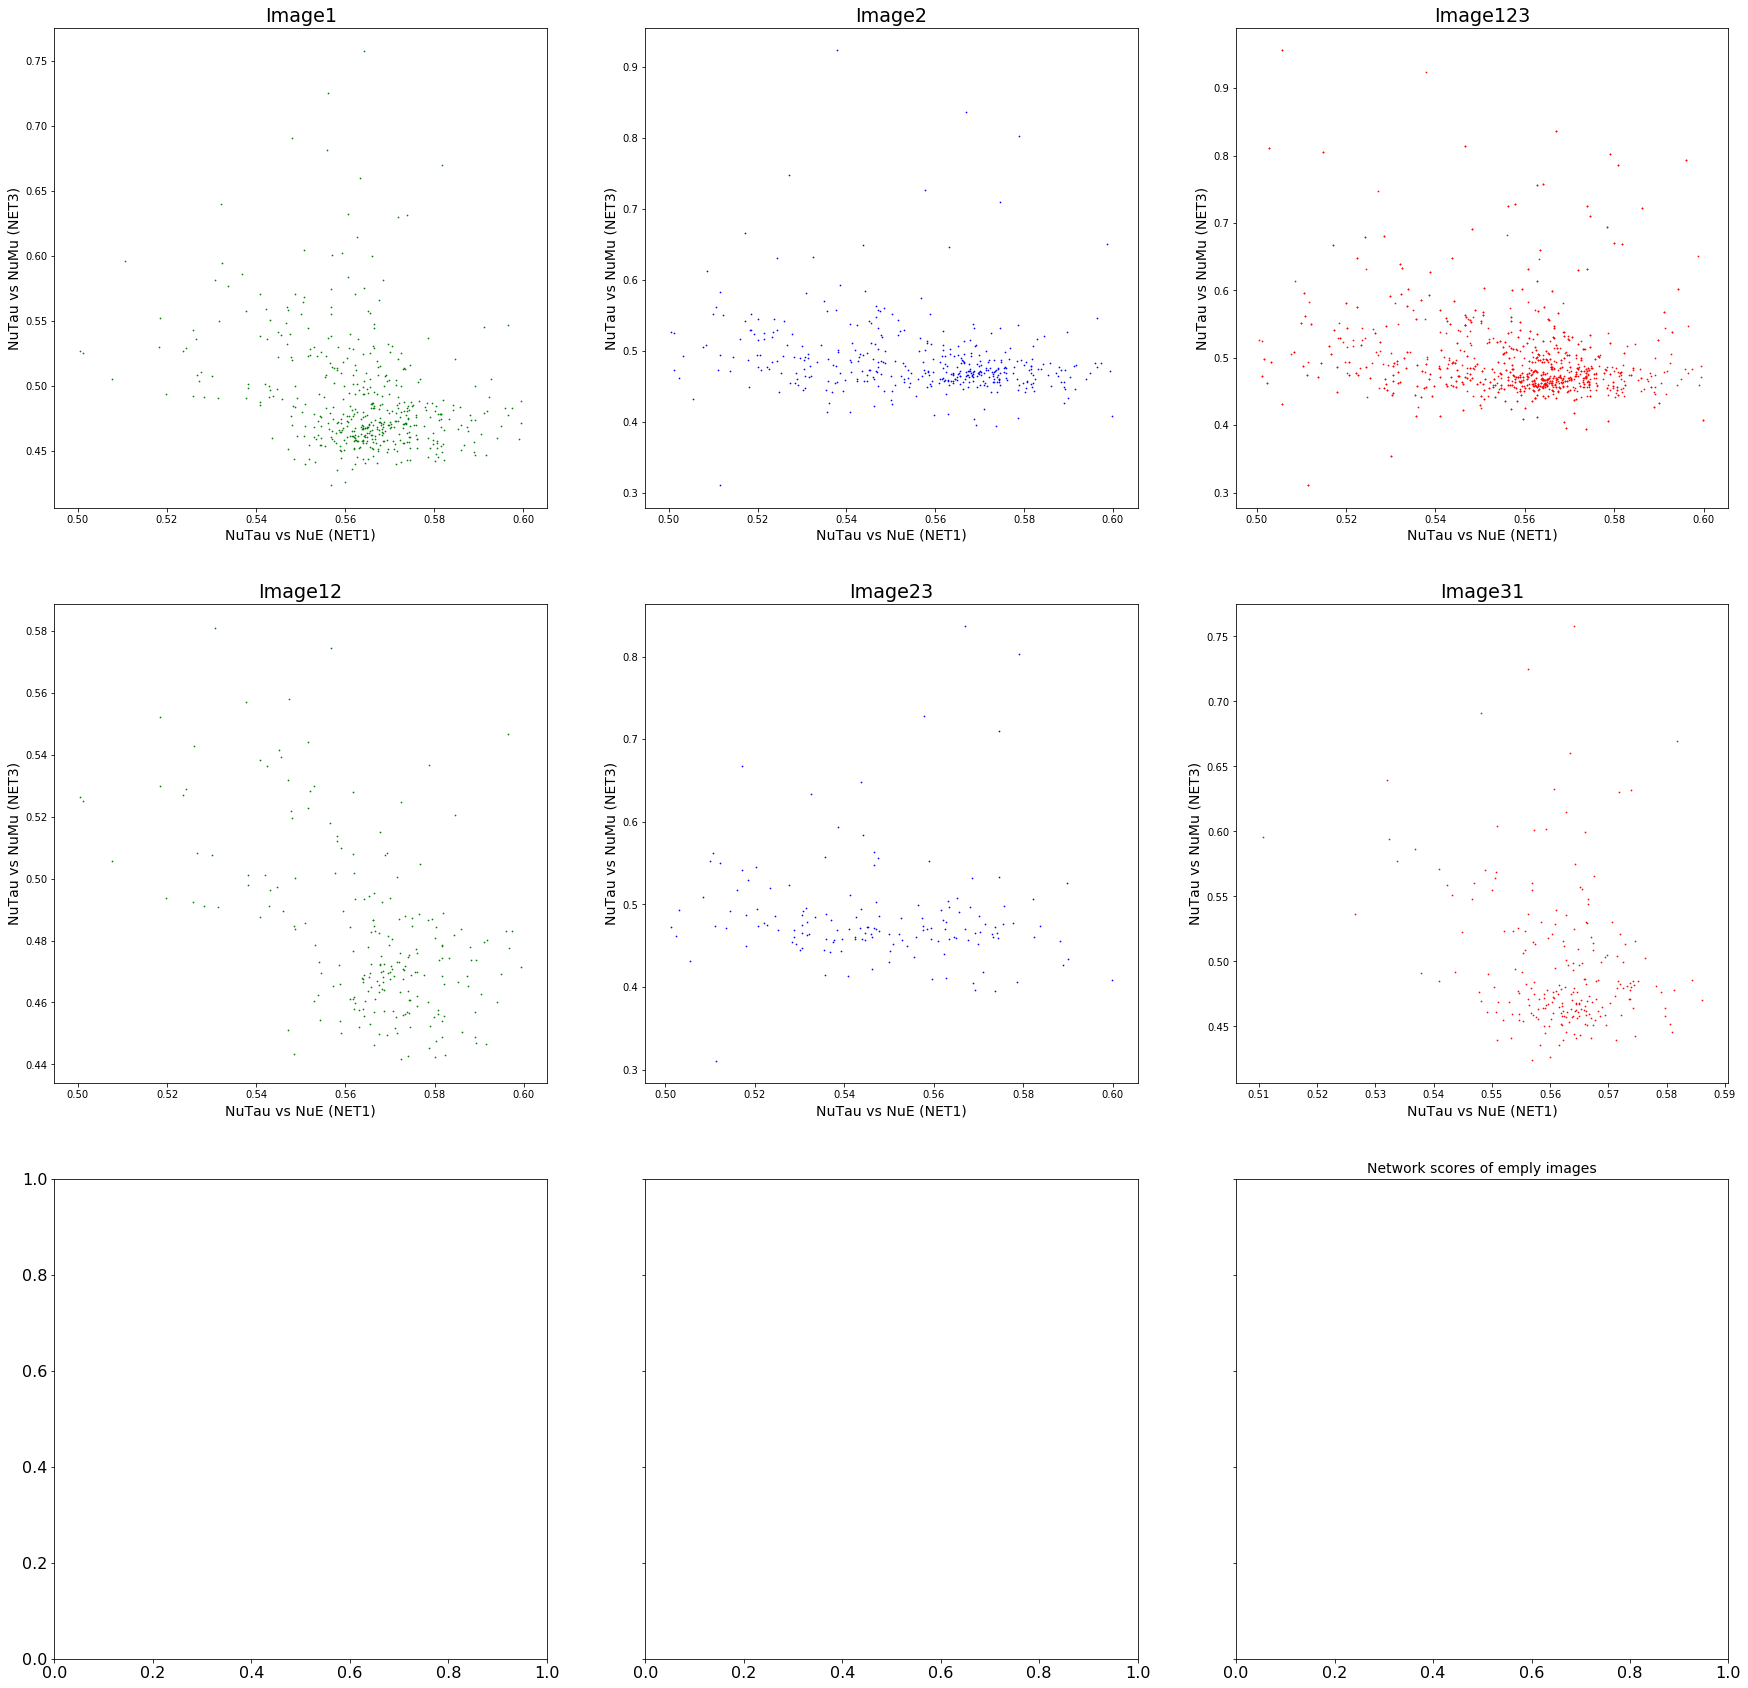

In [402]:
fig, ax = plt.subplots(nrows=3, ncols=3,sharex = True,sharey=True, figsize=(30,30),facecolor ='w')
plt.title('Network scores of emply images', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(3,3,1)
ax = plt.gca()
ax.set_title('Image1')
plt.scatter(data2[mask_i0 & mask2]['preds']['n1'],data2[mask_i0 & mask2]['preds']['n3'], c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,2)
ax = plt.gca()
ax.set_title('Image2')
plt.scatter(data2[mask_i1 & mask2]['preds']['n1'],data2[mask_i1 & mask2]['preds']['n3'], c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,3)
ax = plt.gca()
ax.set_title('Image3')
plt.scatter(data2[mask_i2 & mask2]['preds']['n1'],data2[mask_i2 & mask2]['preds']['n3'], c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,4)
ax = plt.gca()
ax.set_title('Image12')
plt.scatter(data2[mask_i01 & mask2]['preds']['n1'],data2[mask_i01 & mask2]['preds']['n3'], c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,5)
ax = plt.gca()
ax.set_title('Image23')
plt.scatter(data2[mask_i12 & mask2]['preds']['n1'],data2[mask_i12 & mask2]['preds']['n3'], c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,6)
ax = plt.gca()
ax.set_title('Image31')
plt.scatter(data2[mask_i02 & mask2]['preds']['n1'],data2[mask_i02 & mask2]['preds']['n3'], c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,3)
ax = plt.gca()
ax.set_title('Image123')
plt.scatter(data2[mask_i012 & mask2]['preds']['n1'],data2[mask_i012 & mask2]['preds']['n3'], c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.show()

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


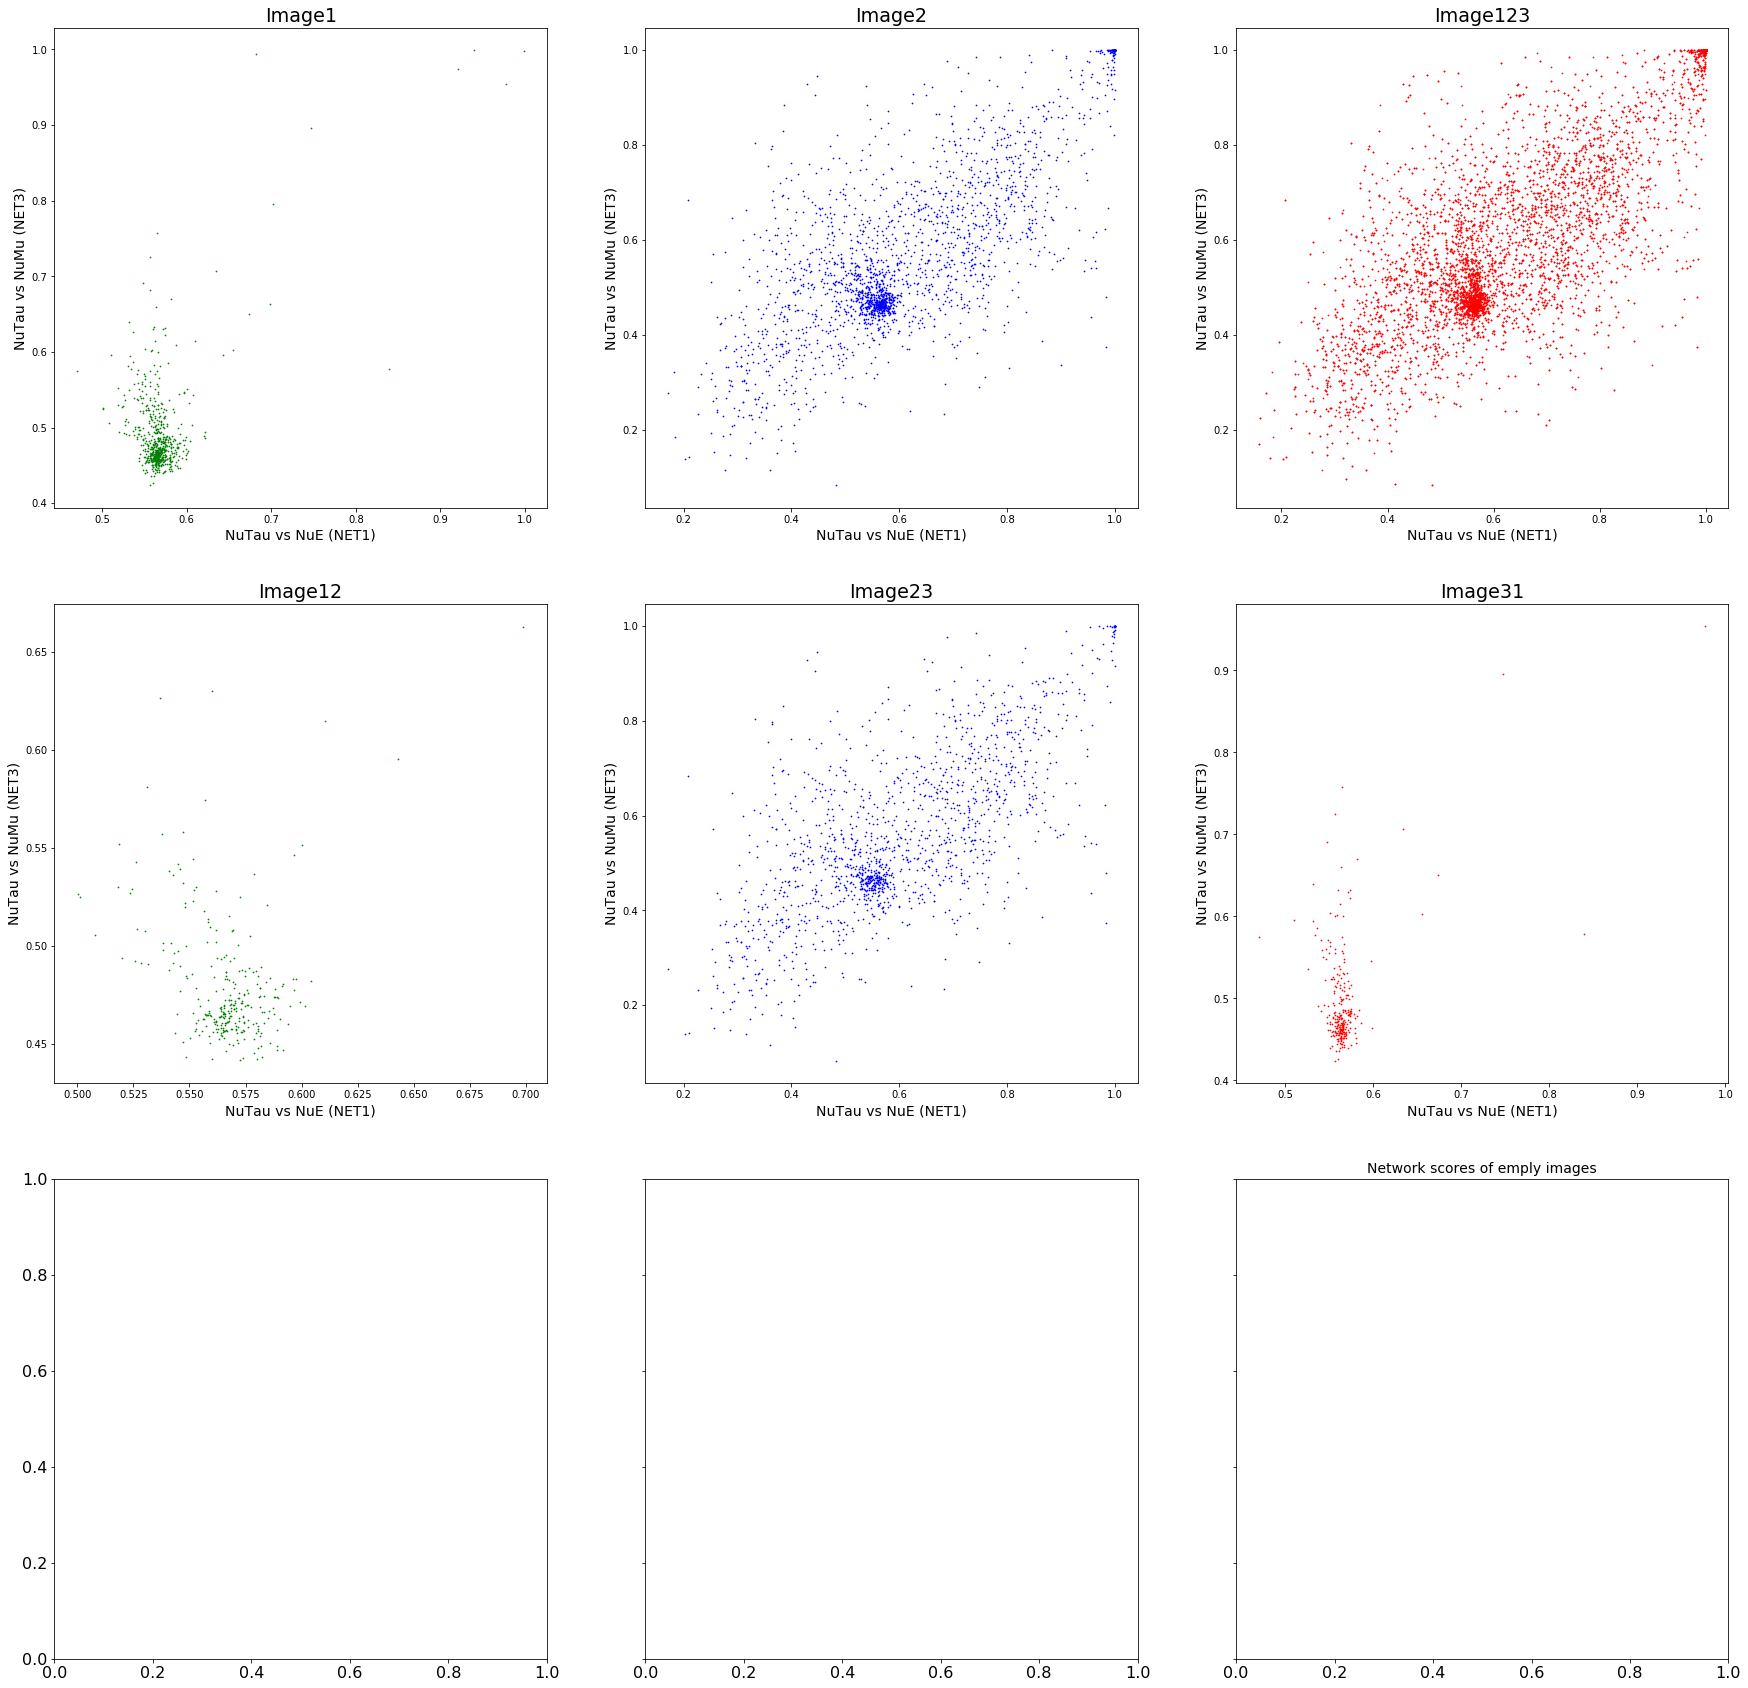

In [403]:
fig, ax = plt.subplots(nrows=3, ncols=3,sharex = True,sharey=True, figsize=(30,30),facecolor ='w')
plt.title('Network scores of emply images', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(3,3,1)
ax = plt.gca()
ax.set_title('Image1')
plt.scatter(data2[mask_i0]['preds']['n1'],data2[mask_i0]['preds']['n3'], c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,2)
ax = plt.gca()
ax.set_title('Image2')
plt.scatter(data2[mask_i1]['preds']['n1'],data2[mask_i1]['preds']['n3'], c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,3)
ax = plt.gca()
ax.set_title('Image3')
plt.scatter(data2[mask_i2]['preds']['n1'],data2[mask_i2]['preds']['n3'], c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,4)
ax = plt.gca()
ax.set_title('Image12')
plt.scatter(data2[mask_i01]['preds']['n1'],data2[mask_i01]['preds']['n3'], c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,5)
ax = plt.gca()
ax.set_title('Image23')
plt.scatter(data2[mask_i12]['preds']['n1'],data2[mask_i12]['preds']['n3'], c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,6)
ax = plt.gca()
ax.set_title('Image31')
plt.scatter(data2[mask_i02]['preds']['n1'],data2[mask_i02]['preds']['n3'], c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,3)
ax = plt.gca()
ax.set_title('Image123')
plt.scatter(data2[mask_i012]['preds']['n1'],data2[mask_i012]['preds']['n3'], c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.show()

In [404]:
N=5
s= 300
max_diff_poses= []
max_diffs = []
mask_dif = []
for e in data2:
    diff_times = np.diff(e['wf_times'][:,0][:N])
    #print(diff_times[:N])
    max_diff_pos = np.argmax(diff_times)
    max_diff = diff_times[max_diff_pos]
    
    #print(max_diff_pos)
    max_diff_poses.append(max_diff_pos)
    max_diffs.append(max_diff)
    
    #print("CCC",diff_times[max_diff_pos],diff_times)
    #if diff_times[max_diff_pos] > 100:#
    #   min_time = wf_times[max_diff_pos+1]
    #else:
    #    min_time = wf_times[0]
max_diff_poses = np.array(max_diff_poses)
max_diffs = np.array(max_diffs)

print(len(max_diff_poses))

256460


In [405]:
print(len(max_diff_poses[max_diff_poses == 1])/len(max_diff_poses))
print(len(max_diff_poses[max_diff_poses == 3])/len(max_diff_poses))

0.16685253060906186
0.37373079622553224


In [406]:
def Plot1(Name,Label,data_t,xscale='linear',b =N,r =[0,N], loc = 8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    #weights_t = np.ones(data_t.shape[0])/data_t.shape[0]
    
    #ax.set_xscale(xscale)
    #ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.74,'#EventsT '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
   

    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    #ax.hist(data_t, bins =b, weights = weights_t, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_t, bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    
   
    plt.legend()
    plt.show()


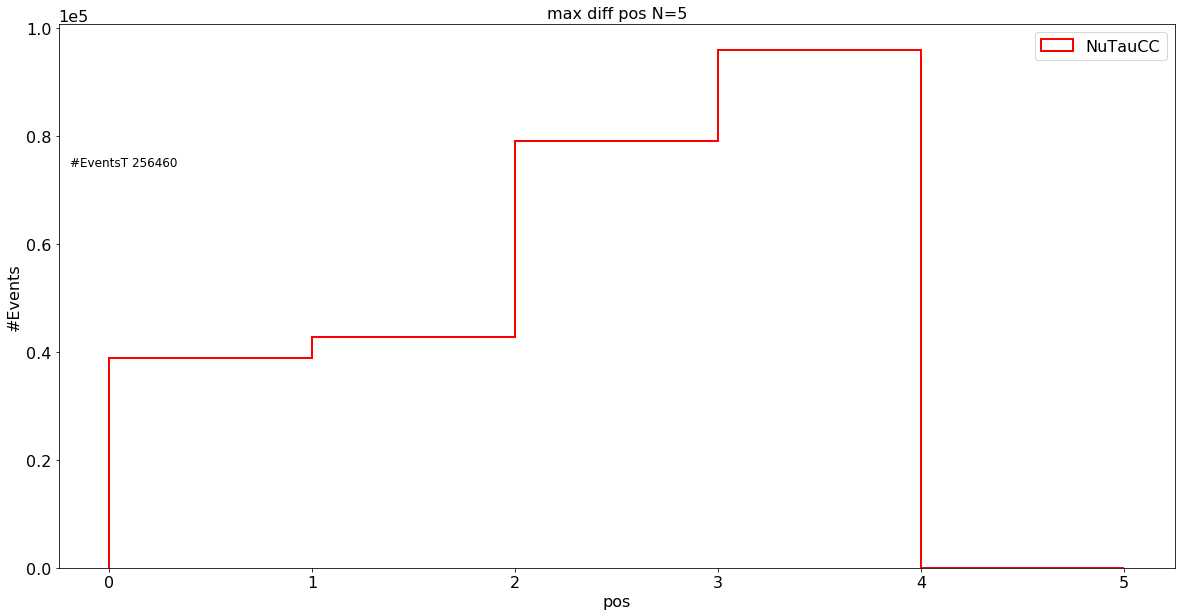

In [407]:
Plot1("max diff pos N=5", "pos",max_diff_poses)

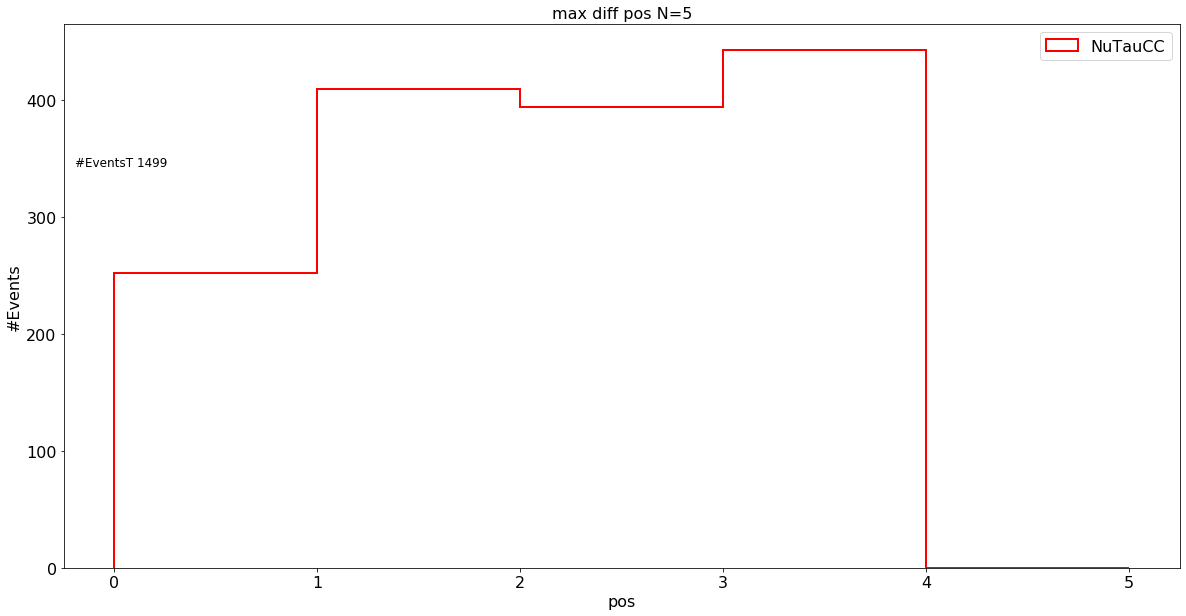

In [408]:
Plot1("max diff pos N=5", "pos",max_diff_poses[mask2])

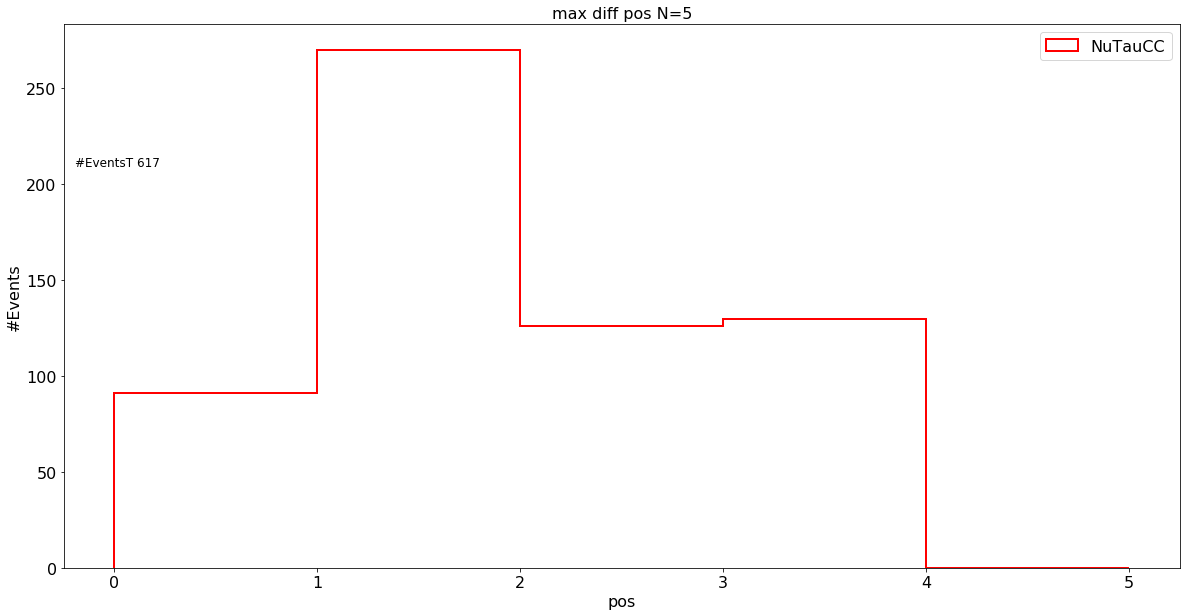

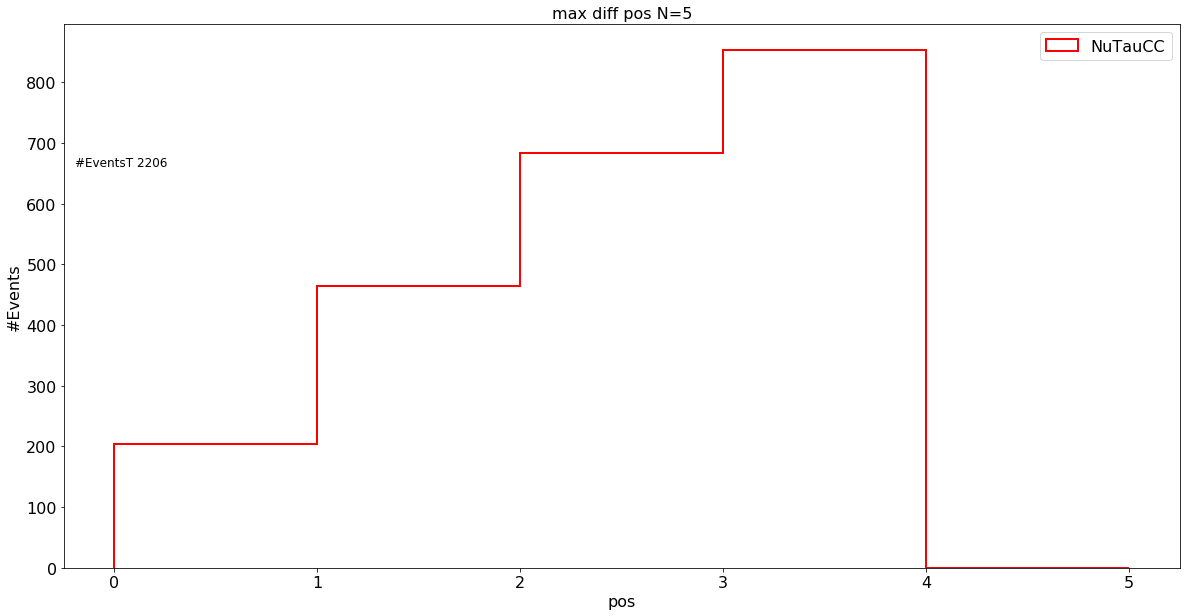

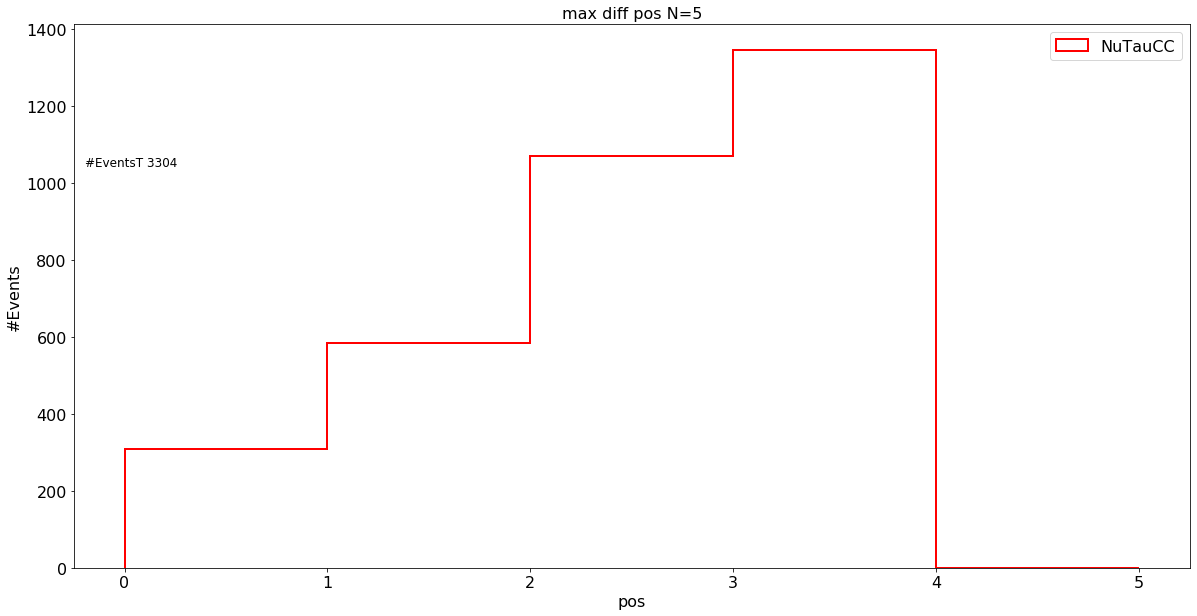

In [409]:
Plot1("max diff pos N=5", "pos",max_diff_poses[mask_i0])
Plot1("max diff pos N=5", "pos",max_diff_poses[mask_i1])
Plot1("max diff pos N=5", "pos",max_diff_poses[mask_i2])

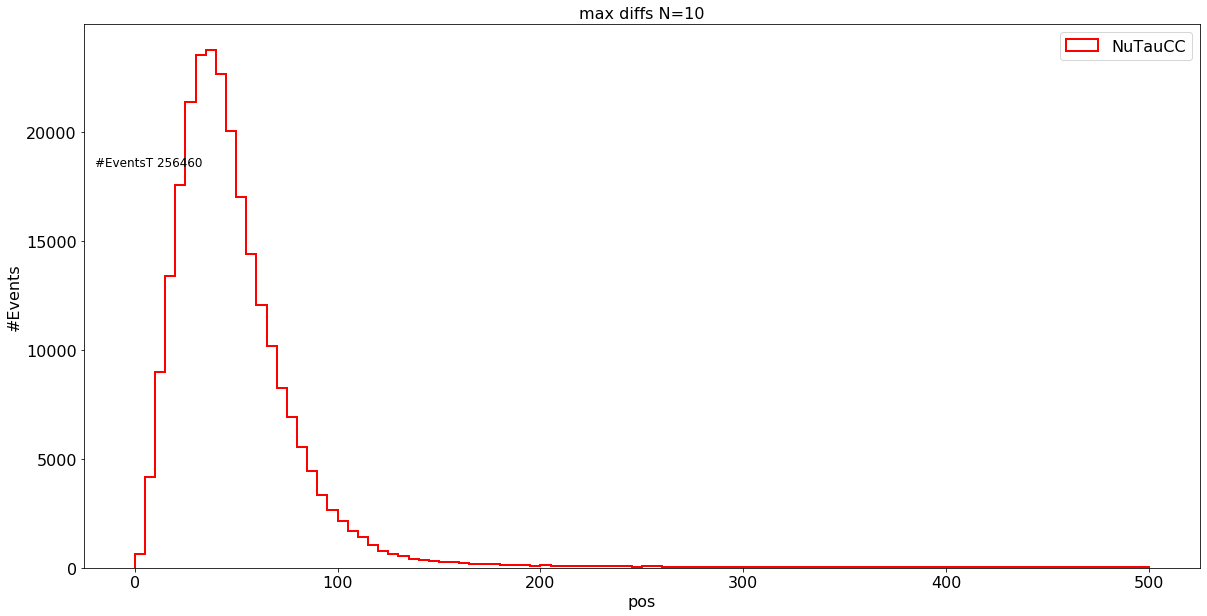

In [410]:
Plot1("max diffs N=10", "pos",max_diffs,b=100,r=[0,500])

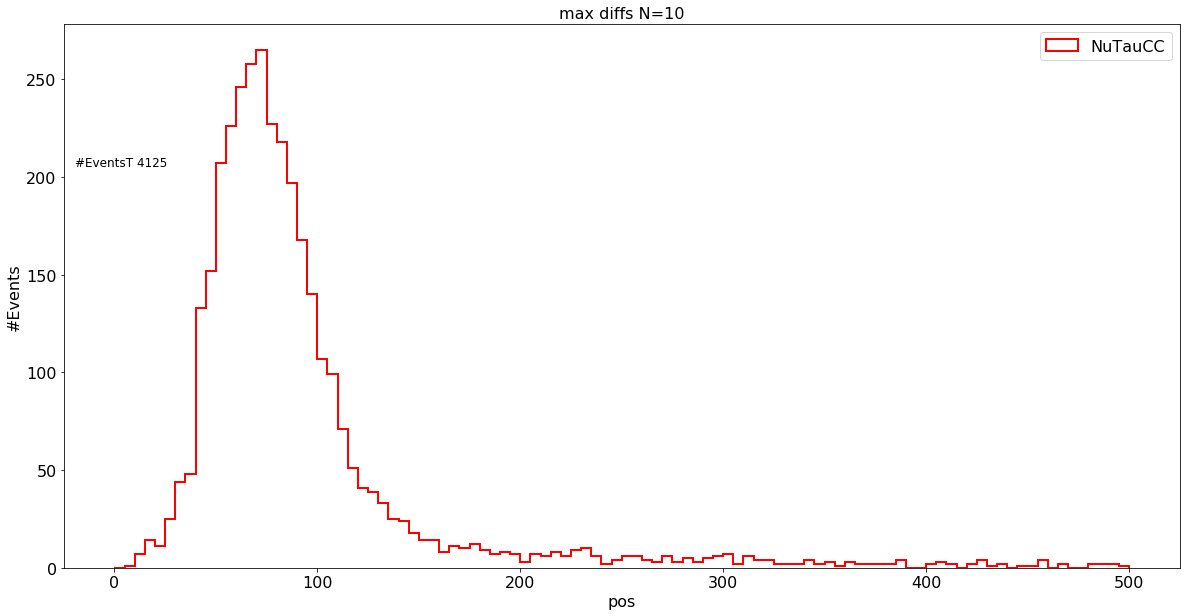

In [411]:
Plot1("max diffs N=10", "pos",max_diffs[mask_i012],b=100,r=[0,500])

In [412]:
mask_d = max_diff_poses <= 2
mask_di12 = mask_d & mask_i12

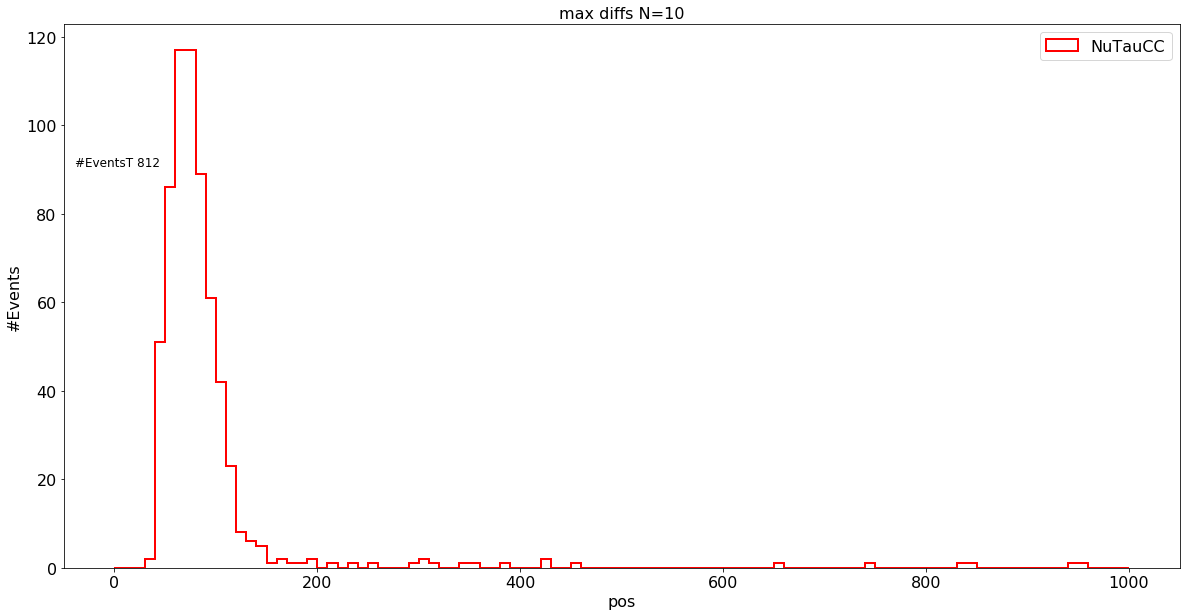

In [413]:
Plot1("max diffs N=10", "pos",max_diffs[mask_di12],b=100,r=[0,1000])

In [414]:
N= 3
s= 100
mask_dif = []
for e in data2:
    diff_times = np.diff(e['wf_times'][:,0][:N])
    #print(diff_times[:N])
    max_diff_pos = np.argmax(diff_times)
    max_diff = diff_times[max_diff_pos]
    if (max_diff < s): #and (e["im_sum"][0] !=0):
        mask_dif.append(True)
    else:
        mask_dif.append(False)

mask_dif = np.array(mask_dif)

print(len(max_diff_poses))

256460


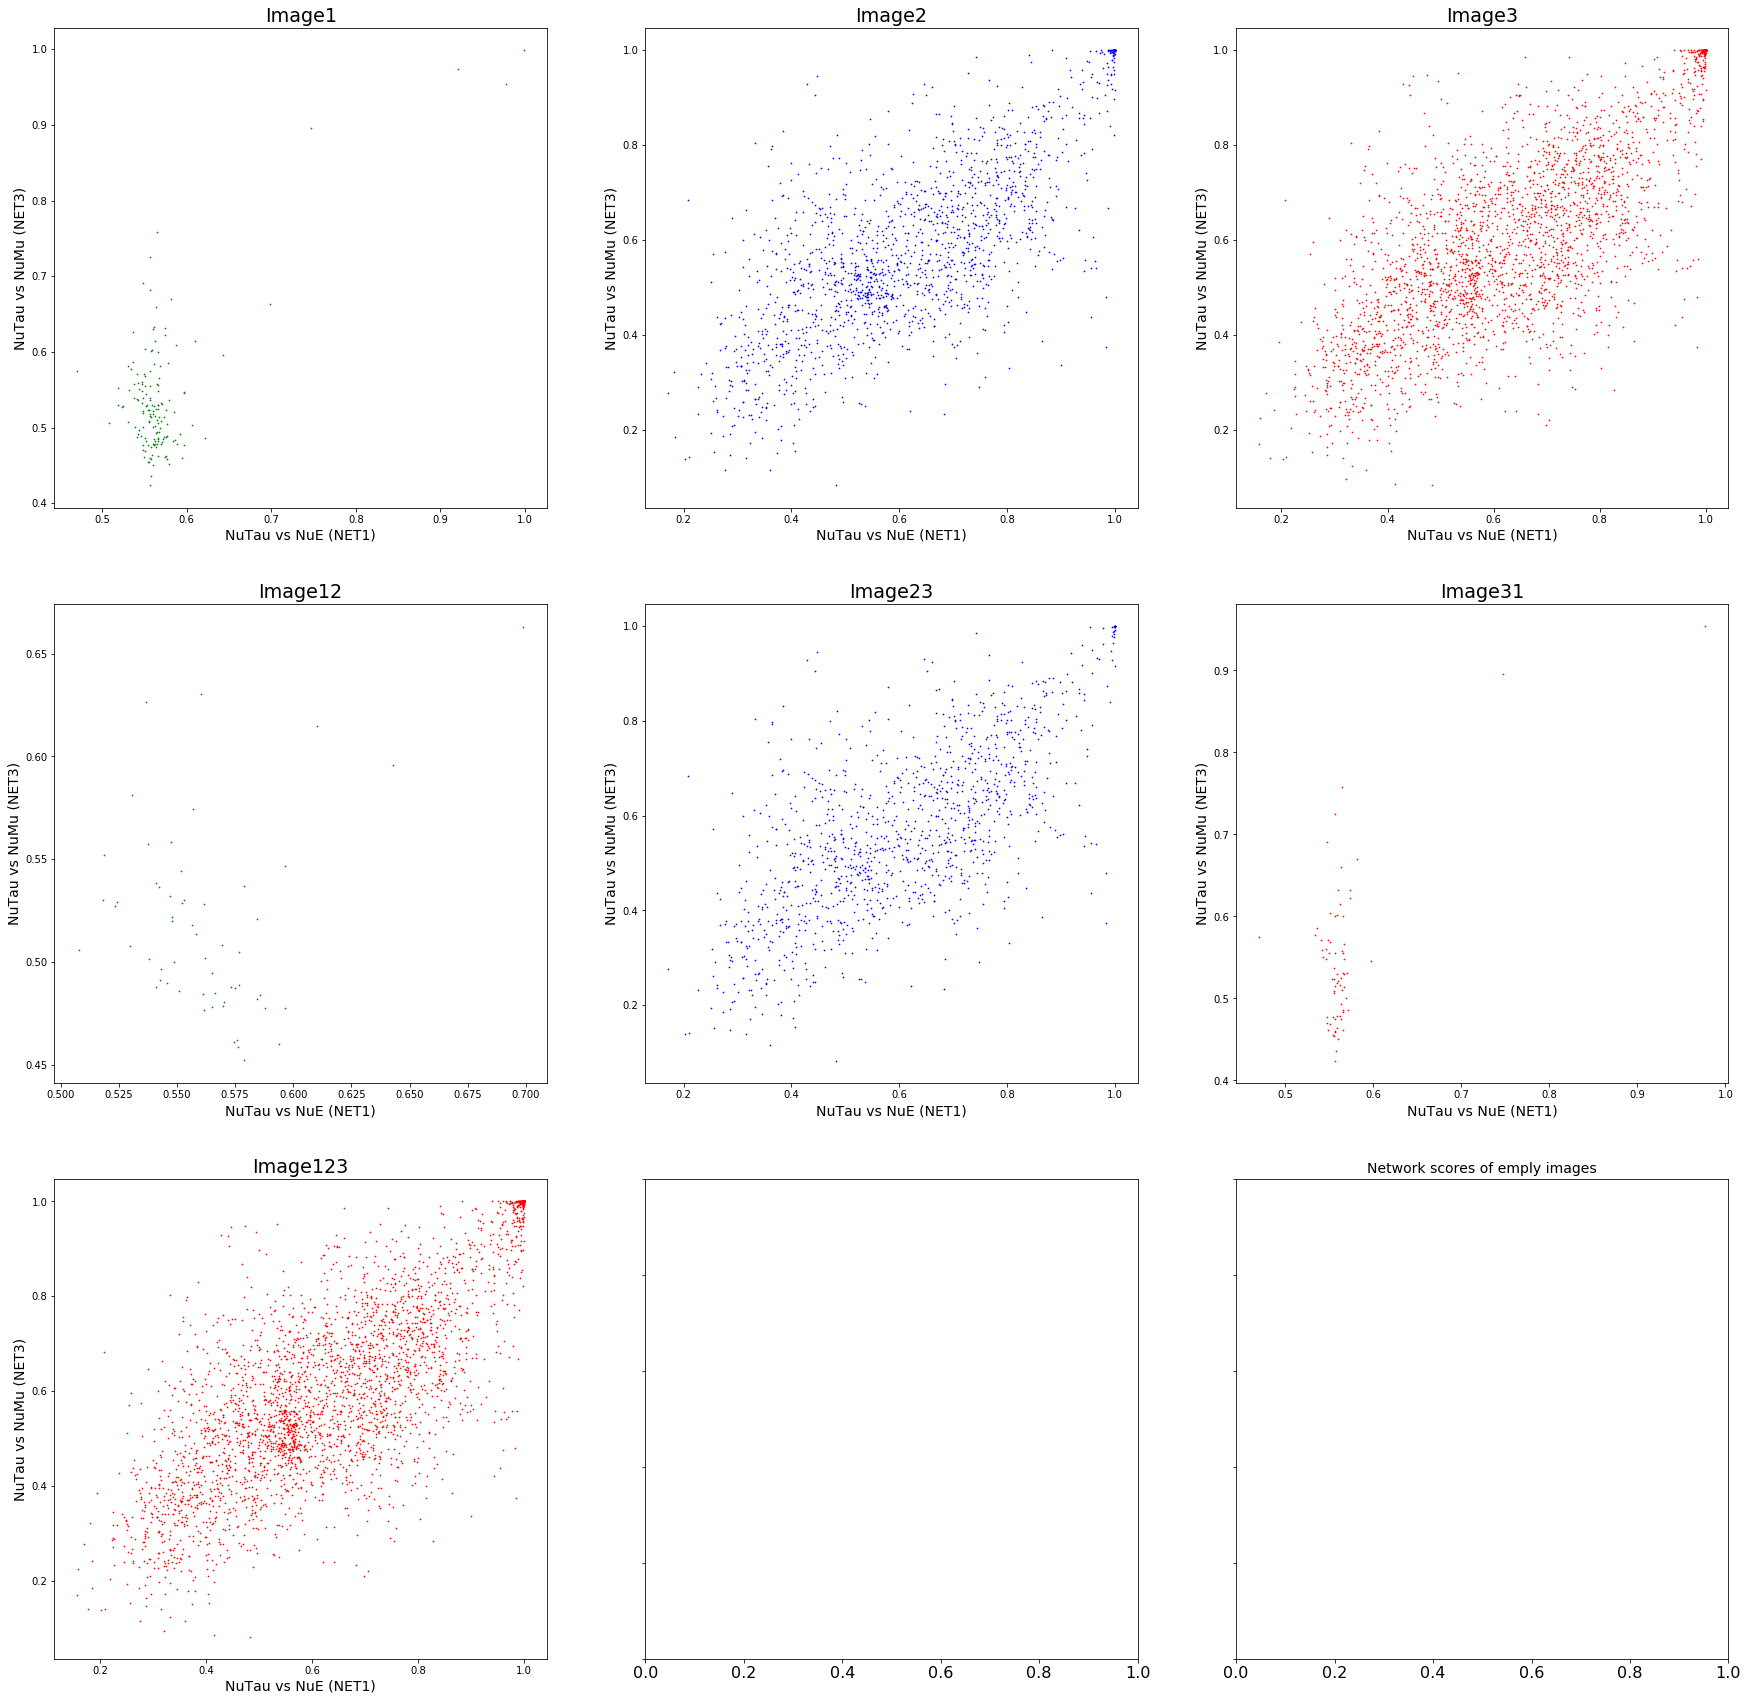

In [415]:
fig, ax = plt.subplots(nrows=3, ncols=3,sharex = True,sharey=True, figsize=(30,30),facecolor ='w')
plt.title('Network scores of emply images', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(3,3,1)
ax = plt.gca()
ax.set_title('Image1')
plt.scatter(data2[mask_i0 & mask_dif]['preds']['n1'],data2[mask_i0 & mask_dif]['preds']['n3'], c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,2)
ax = plt.gca()
ax.set_title('Image2')
plt.scatter(data2[mask_i1 & mask_dif]['preds']['n1'],data2[mask_i1 & mask_dif]['preds']['n3'], c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,3)
ax = plt.gca()
ax.set_title('Image3')
plt.scatter(data2[mask_i2 & mask_dif]['preds']['n1'],data2[mask_i2 & mask_dif]['preds']['n3'], c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,4)
ax = plt.gca()
ax.set_title('Image12')
plt.scatter(data2[mask_i01 & mask_dif]['preds']['n1'],data2[mask_i01 & mask_dif]['preds']['n3'], c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,5)
ax = plt.gca()
ax.set_title('Image23')
plt.scatter(data2[mask_i12 & mask_dif]['preds']['n1'],data2[mask_i12 & mask_dif]['preds']['n3'], c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,6)
ax = plt.gca()
ax.set_title('Image31')
plt.scatter(data2[mask_i02 & mask_dif]['preds']['n1'],data2[mask_i02 & mask_dif]['preds']['n3'], c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,7)
ax = plt.gca()
ax.set_title('Image123')
plt.scatter(data2[mask_i012 & mask_dif]['preds']['n1'],data2[mask_i012 & mask_dif]['preds']['n3'], c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.show()

In [416]:
print(len(data2[~mask_dif])/len(data2)*100)
print(len(data2[mask_i0])/len(data2)*100)
print(len(data2[mask_i0 | ~mask_dif])/len(data2)*100)


3.428214926304297
0.2405833268345941
3.4874834282149263


In [417]:
set1 = set([(i["run_id"],i["sub_run_id"],i["event_id"],i["sub_event_id"]) for i in data3['id']])

In [434]:
N= 3
s= 750
y = 0
n = 0
r1 = []
r2 = []
mask_dif = []
for e in data2:
    diff_times = np.diff(e['wf_times'][:,0][:N])
    #print(diff_times[:N])
    max_diff_pos = np.argmax(diff_times)
    max_diff = diff_times[max_diff_pos]
    #print(max_diff)
    if (max_diff > s): #and (e["im_sum"][0] !=0):
        it = (e['id']["run_id"],e['id']["sub_run_id"],e['id']["event_id"],e['id']["sub_event_id"])
        if it in set1:
            e2 = data3[np.where(data3["id"]==e["id"])]
            #print(e['id'],e2['id'],e2['wf_times'][0][:,0][:N])
            diff_times = np.diff(e2['wf_times'][0][:,0][:N])
            #print(diff_times[:N])
            max_diff_pos = np.argmax(diff_times)
            max_diff = diff_times[max_diff_pos]
            #print("AAA",max_diff, e2['wf_times'][0][:,0][:N],e2["preds"],e["preds"])
            r1.append(e)
            r2.append(e2)
            
            y =y+1
        else:
            n= n+1
r1 = np.array(r1)
r2 = np.array(r2)

In [448]:
print(y,n,data2.shape)
print(y/data2.shape[0]*100)

822 999 (256460,)
0.3205178195430087


In [436]:
print(r1[0]['id'],r2[0]['id'])

(639, 4294967295, 444, 0) [(639, 4294967295, 444, 0)]


In [437]:
diff_n1 = []
diff_n2 = []
for n,i in enumerate(r1):
    a = i['preds']['n1']-r2[n]['preds']['n1']
    b = i['preds']['n4']-r2[n]['preds']['n4']
    diff_n1.append(a)
    diff_n2.append(b)
diff_n1 = np.array(diff_n1)
diff_n2 = np.array(diff_n2)

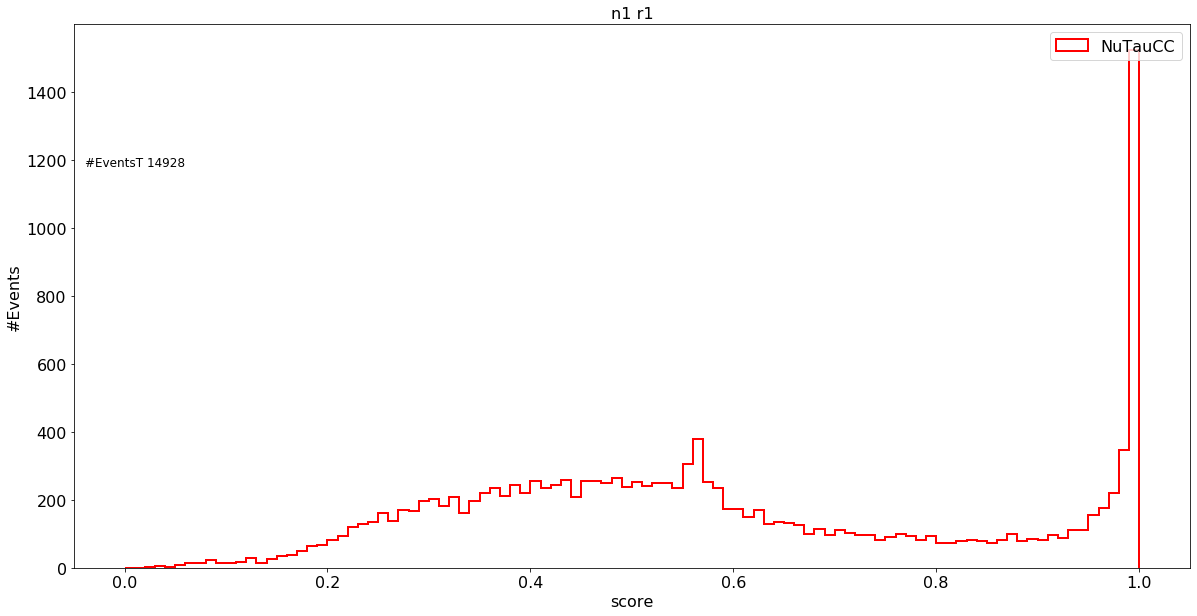

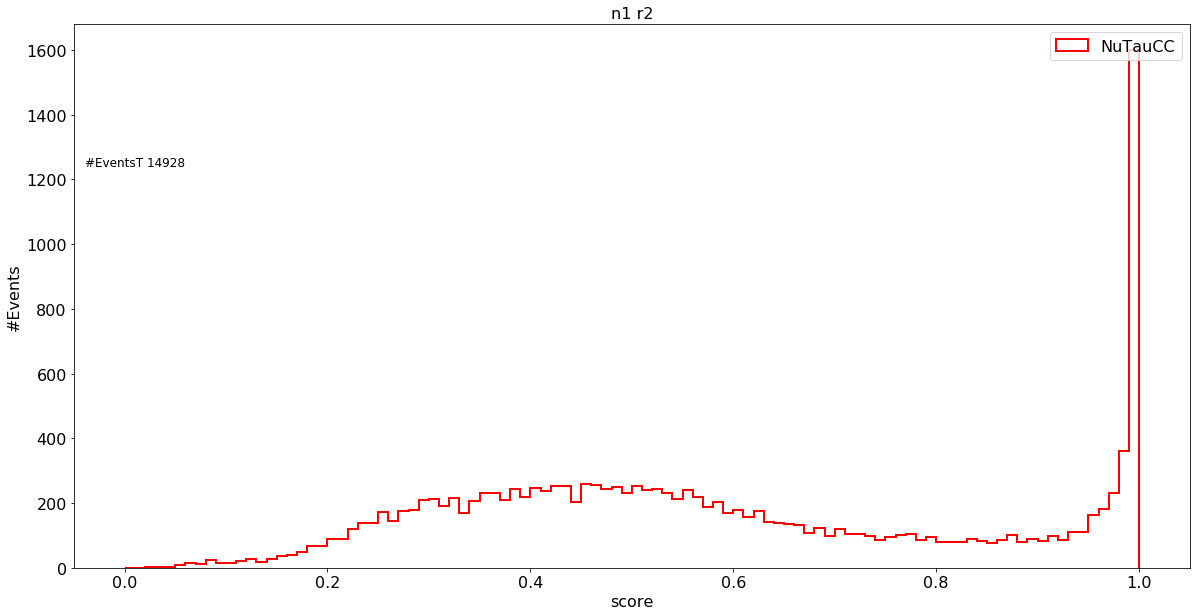

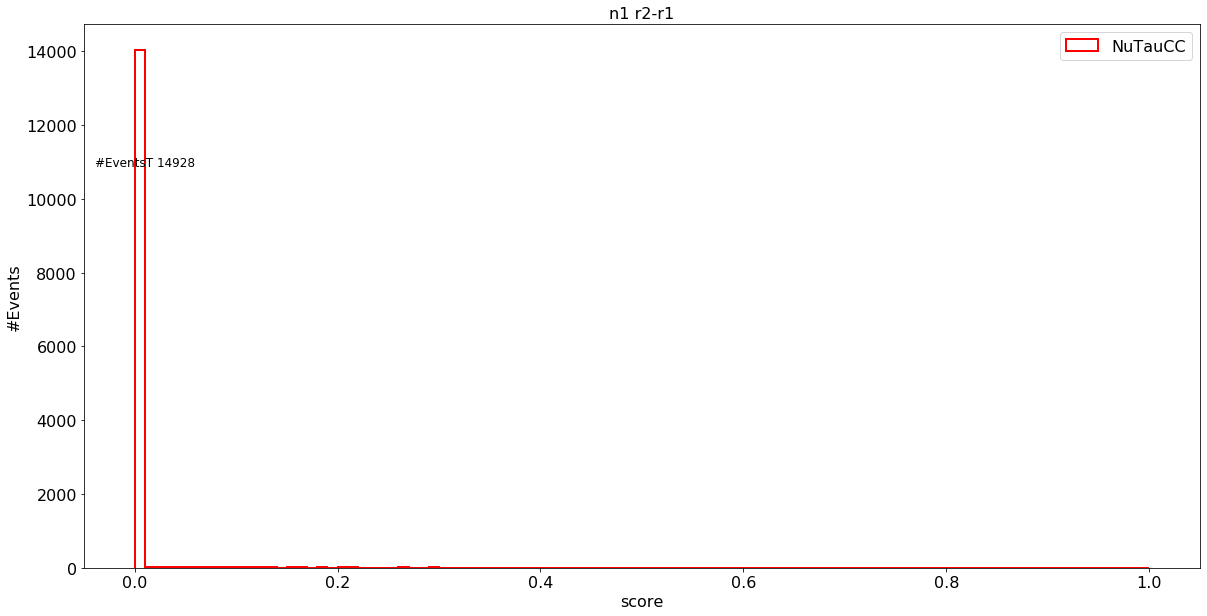

In [422]:
Plot1("n1 r1","score",r1['preds']['n1'],b=100,r=[0,1])
Plot1("n1 r2","score",r2['preds']['n1'],b=100,r=[0,1])
Plot1("n1 r2-r1","score",diff_n1,b=100,r=[0,1])

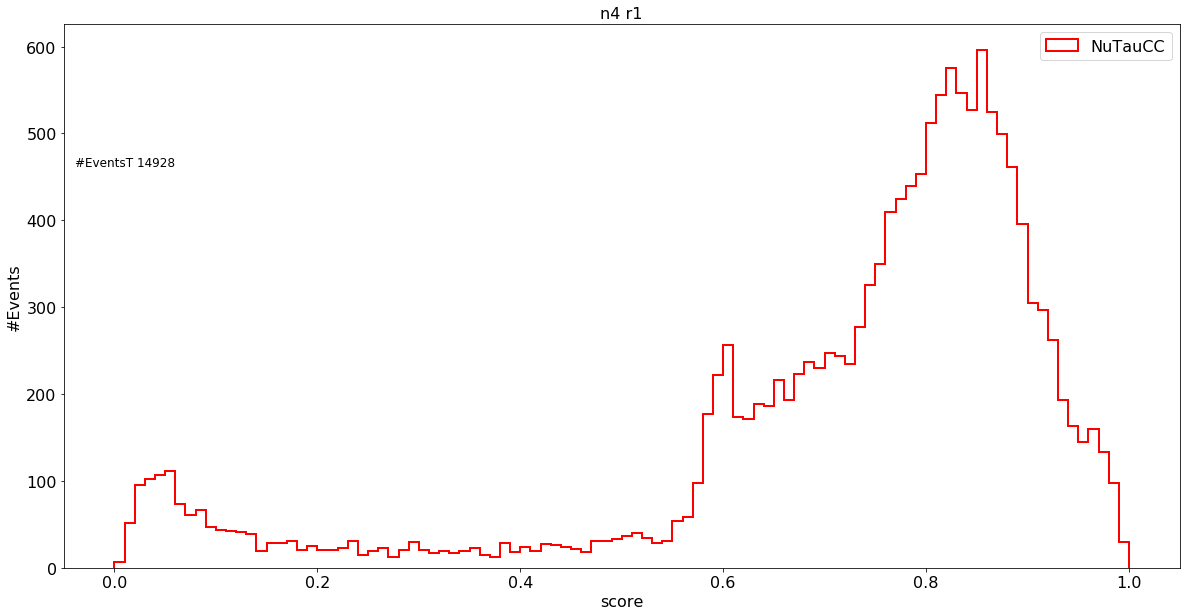

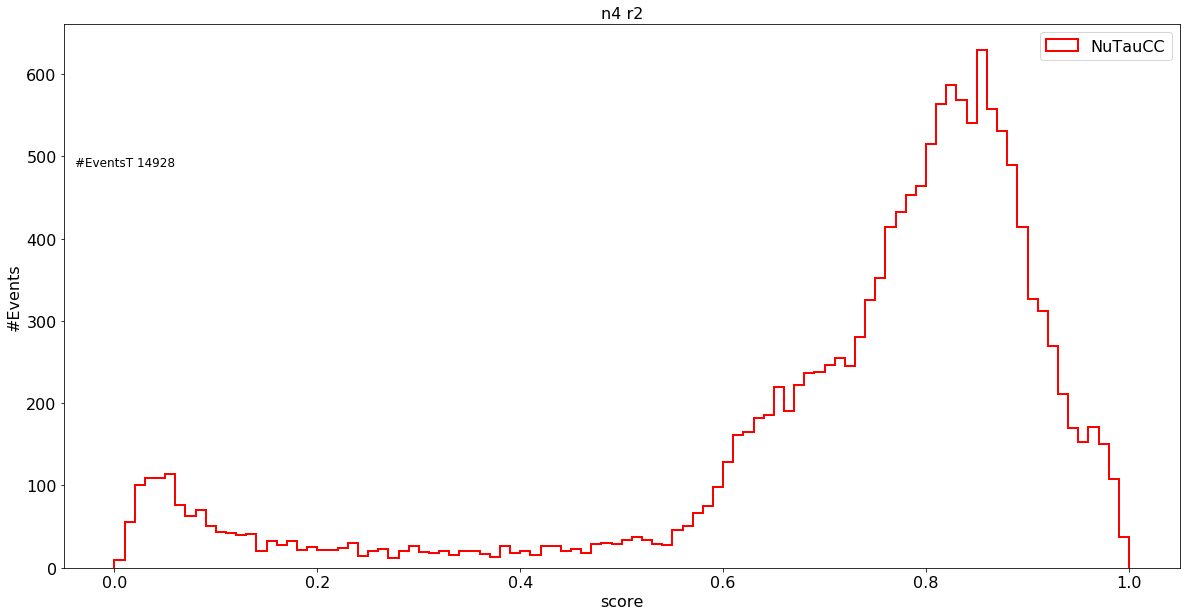

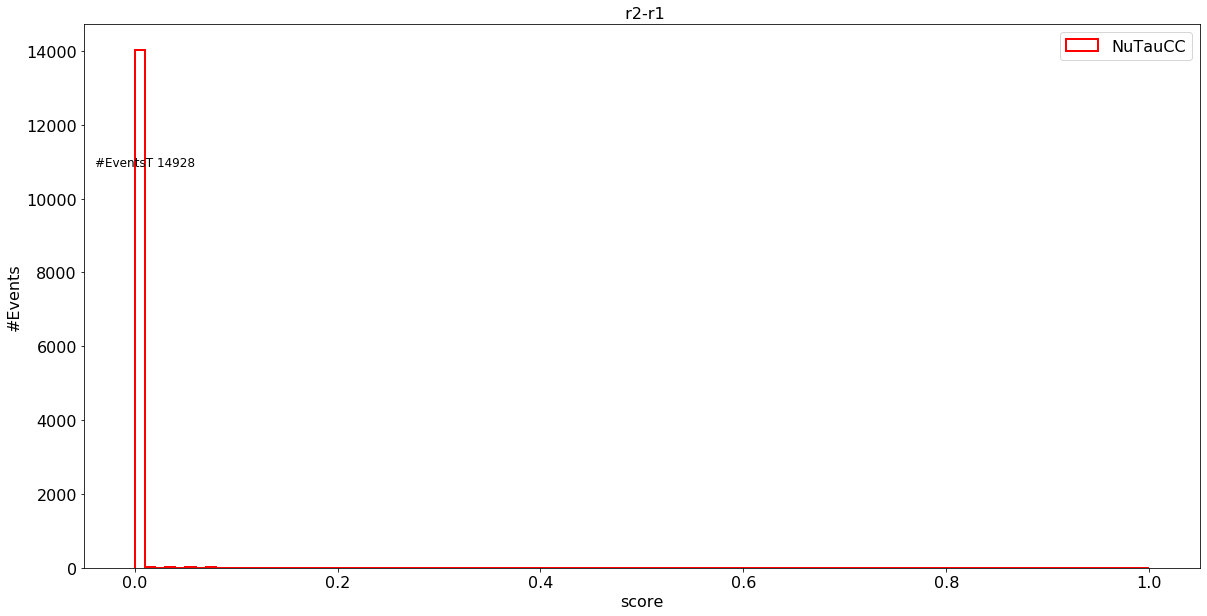

In [423]:
Plot1("n4 r1","score",r1['preds']['n4'],b=100,r=[0,1])
Plot1("n4 r2","score",r2['preds']['n4'],b=100,r=[0,1])
Plot1(" r2-r1","score",diff_n2,b=100,r=[0,1])

In [438]:
import glob
data_1 = []
for file in glob.glob('/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_1*'):
    x = np.load(file, mmap_mode="r")['arr_0']
    print(file, x.shape)
    for i in x:
        data_1.append(i)
data_1 = np.array(data_1)
print(data_1.shape)

/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_1_data.npz (1287, 1)
/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_18_data.npz (1307, 1)
/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_16_data.npz (1326, 1)
/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_14_data.npz (1309, 1)
/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_11_data.npz (1251, 1)
/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_10_data.npz (1230, 1)
/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_15_data.npz (1311, 1)
/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_19_data.npz (1378, 1)
/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_13_data.npz (1294, 1)
/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_17_data.npz (1305, 1)
/home/dup193/work/double_pulse/data/BUMP/Images_BUMP_NuTau_1_1_12_data.npz (1249, 1)
(14247, 1)


In [439]:
data_2 = []
for file in glob.glob('/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_1*'):
    x = np.load(file, mmap_mode="r")['arr_0']
    print(file, x.shape)
    for i in x:
        data_2.append(i)
data_2 = np.array(data_2)
print(data_2.shape)

/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_1_data.npz (1274, 1)
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_18_data.npz (1292, 1)
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_16_data.npz (1306, 1)
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_14_data.npz (1288, 1)
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_11_data.npz (1233, 1)
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_10_data.npz (1215, 1)
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_15_data.npz (1286, 1)
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_19_data.npz (1353, 1)
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_13_data.npz (1277, 1)
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_17_data.npz (1289, 1)
/home/dup193/work/double_pulse/data/BUMP/BUMP3/Images_BUMP_NuTau_1_1_12_data.npz (1235, 1)


In [440]:
def Plot(data_1,data_2,st,ch):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot()
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    #print(data_1[0,:,st,ch-1:ch])
    x= np.linspace(0,500,500)
    ax.plot(x,data_1[0,:,st,ch-1:ch],c ='r', lw =2, label = "1")  
    ax.plot(x,data_2[0,:,st,ch-1:ch],c ='b', lw =2, ls = '--',label = "2")  
    
    plt.show()

In [441]:
def ims(e):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(e['image'][0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
    ax2 = fig.add_subplot(132)
    ax2.imshow(e['image'][0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
    ax3 = fig.add_subplot(133)
    ax3.imshow(e['image'][0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')

In [442]:
set2 = set([(i["run_id"],i["sub_run_id"],i["event_id"],i["sub_event_id"]) for i in r1['id']])

23
[900.38488954  13.62553107] (15, 4294967295, 167, 0)
[900.38488954  13.62553107] (15, 4294967295, 167, 0)


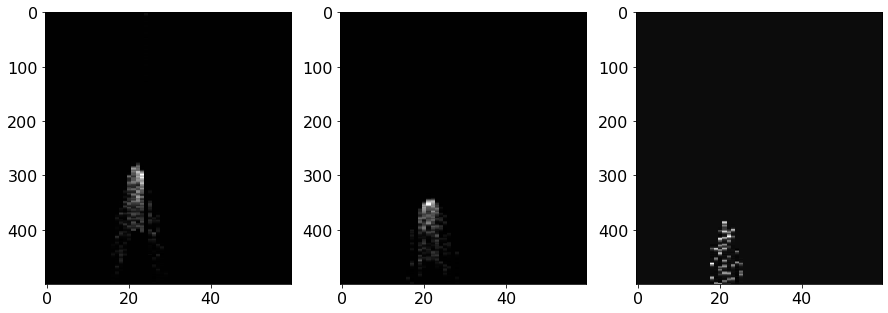

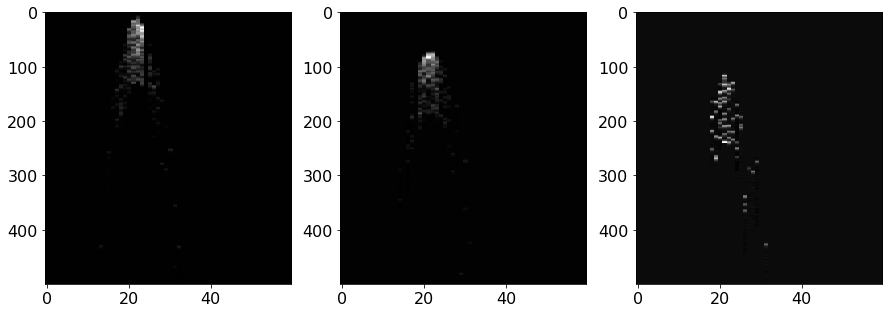

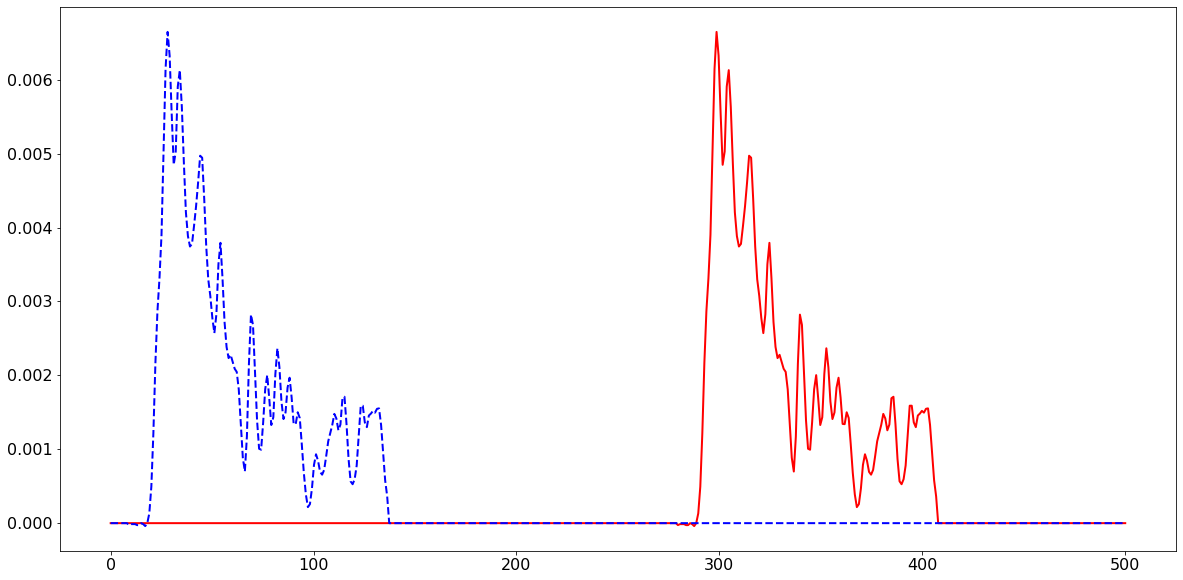

56
[757.84099682 344.39600379] (15, 4294967295, 646, 0)
[757.84099682 344.39600379] (15, 4294967295, 646, 0)


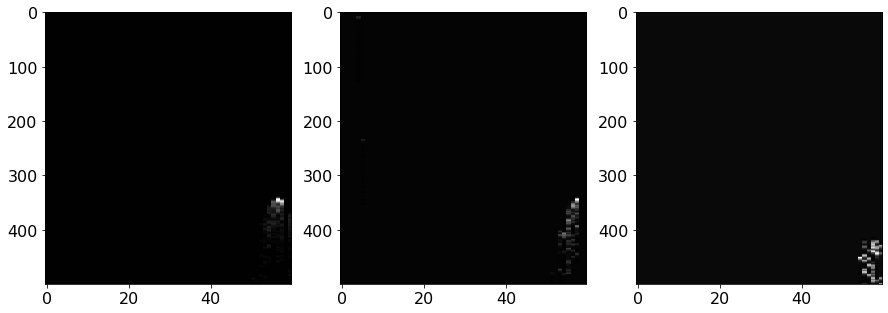

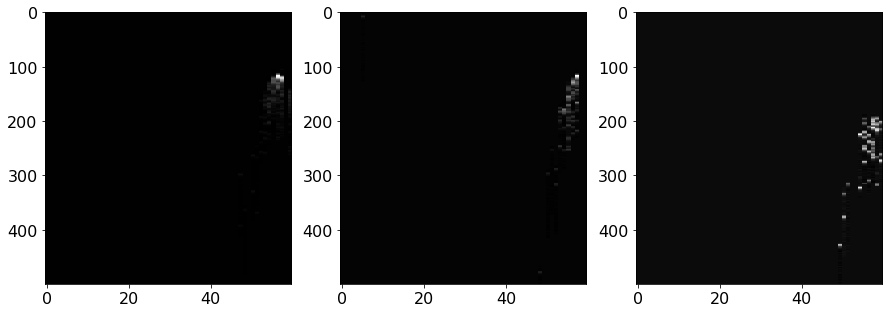

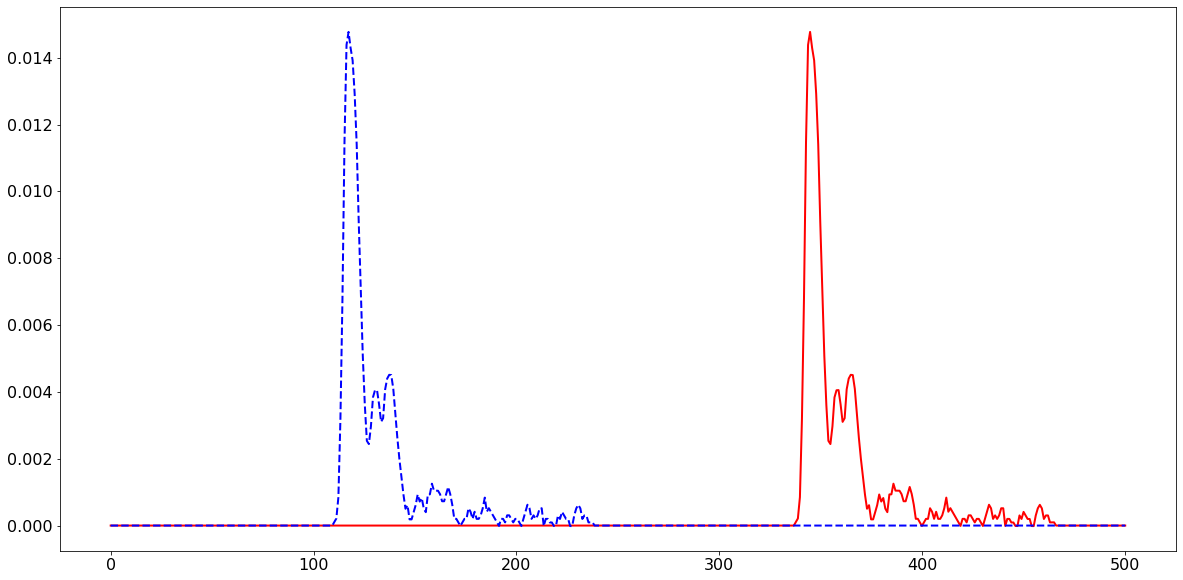

0
[5353.66562037    8.70282543] (12, 4294967295, 204, 0)
[5353.66562037    8.70282543] (12, 4294967295, 204, 0)


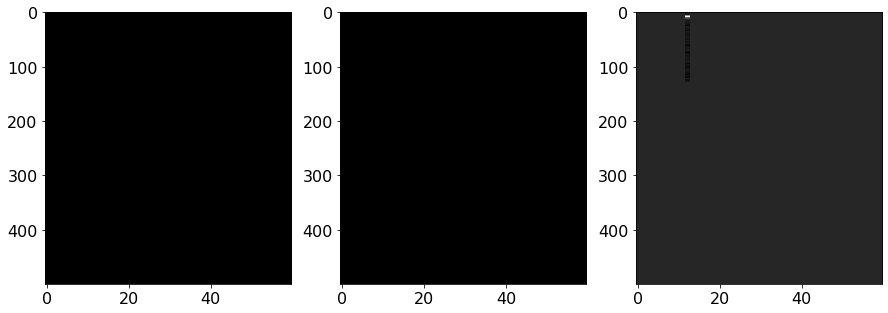

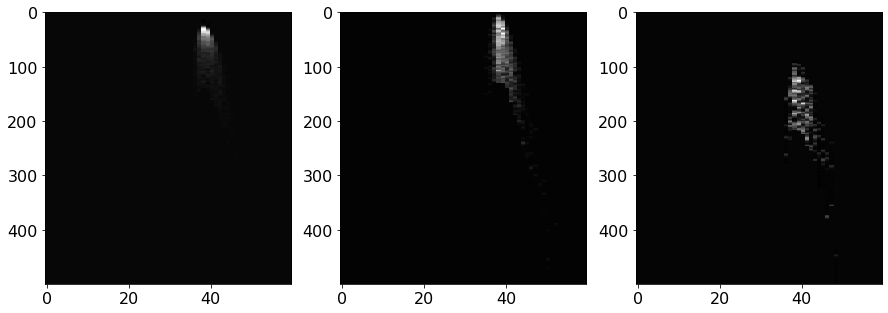

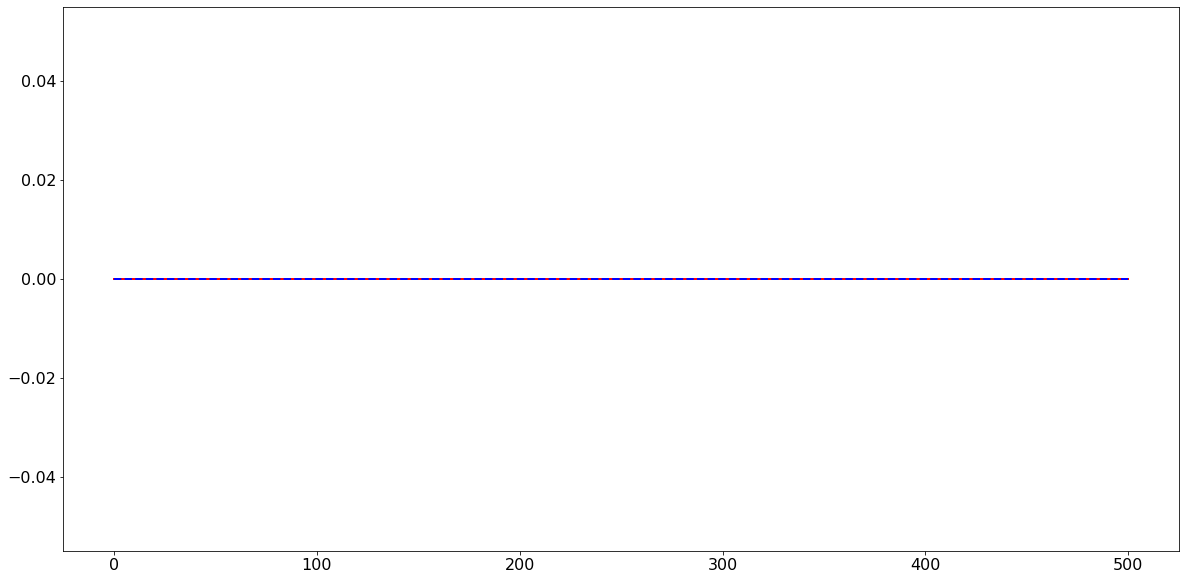

0
[  209.74398968 18477.07661082] (14, 4294967295, 99, 1)
[  209.74398968 18477.07661082] (14, 4294967295, 99, 1)


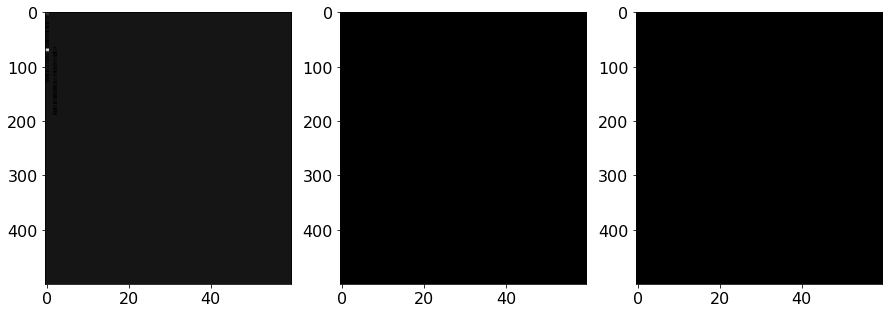

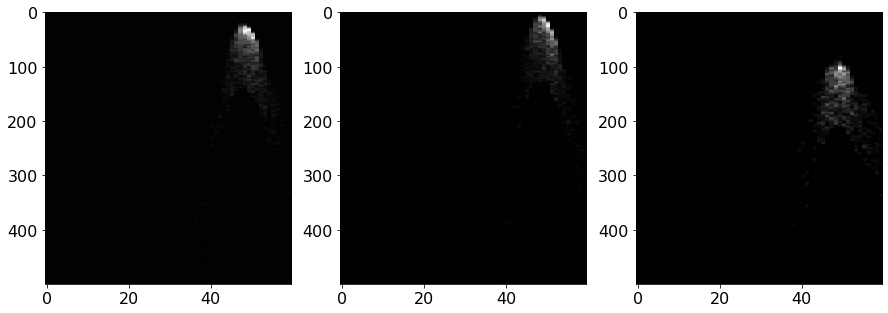

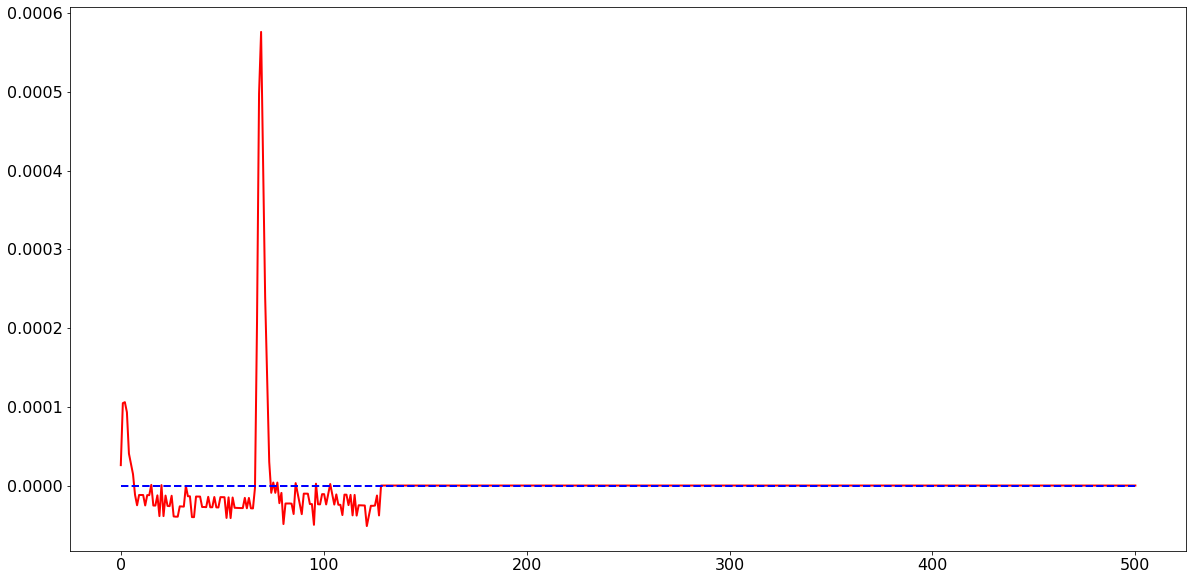

0
[   20.9867172 17128.8282774] (16, 4294967295, 54, 1)
[   20.9867172 17128.8282774] (16, 4294967295, 54, 1)


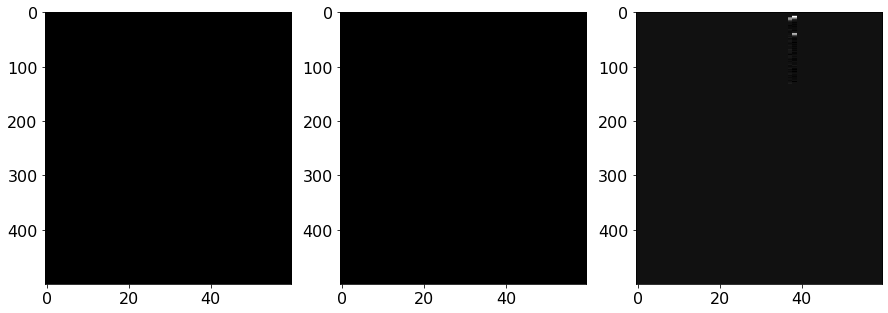

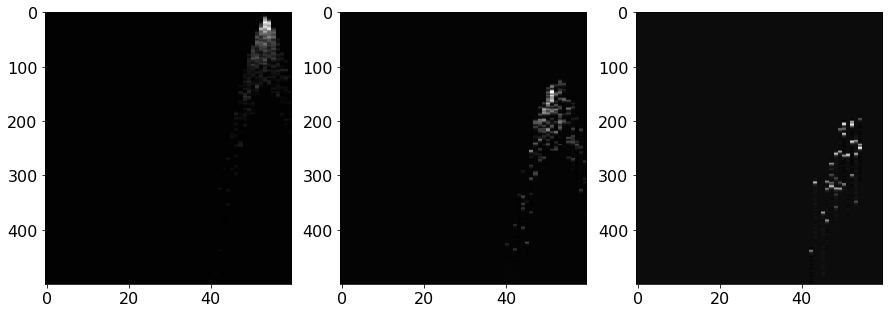

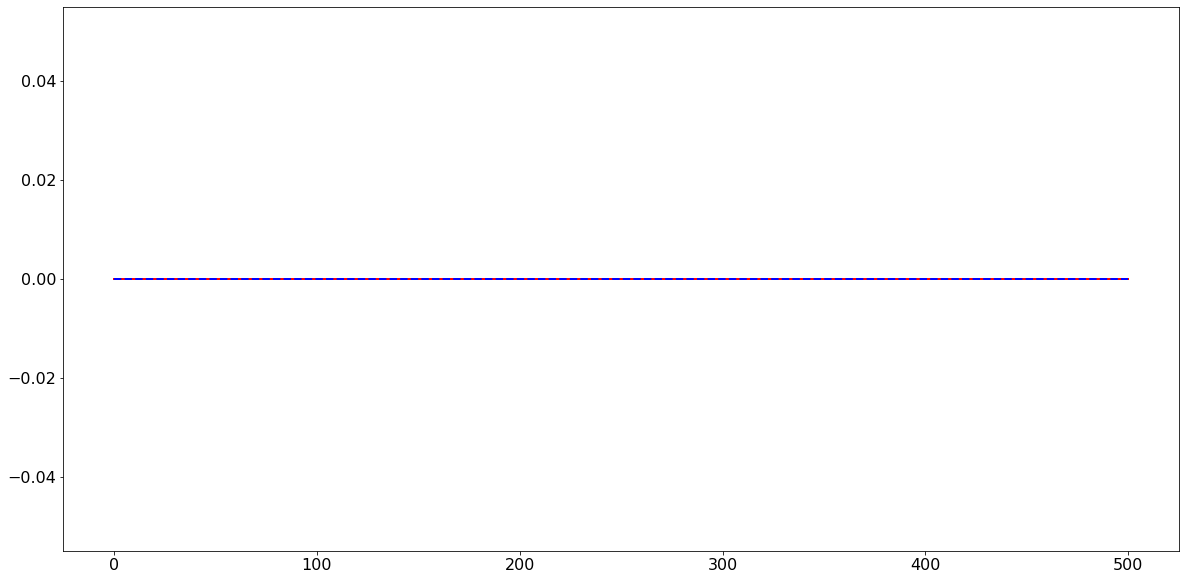

2
[ 229.75547078 1980.49746855] (16, 4294967295, 708, 0)
[ 229.75547078 1980.49746855] (16, 4294967295, 708, 0)


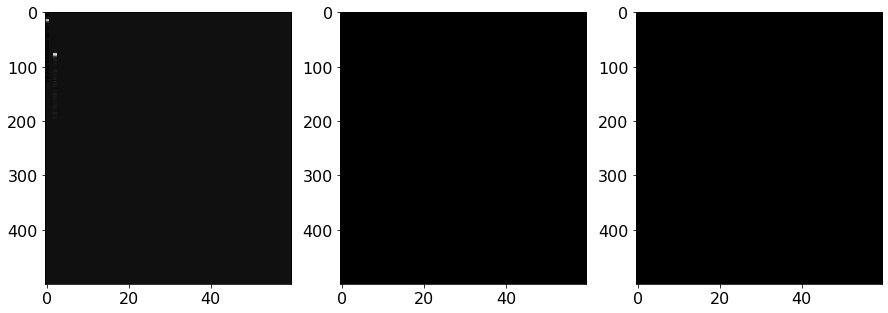

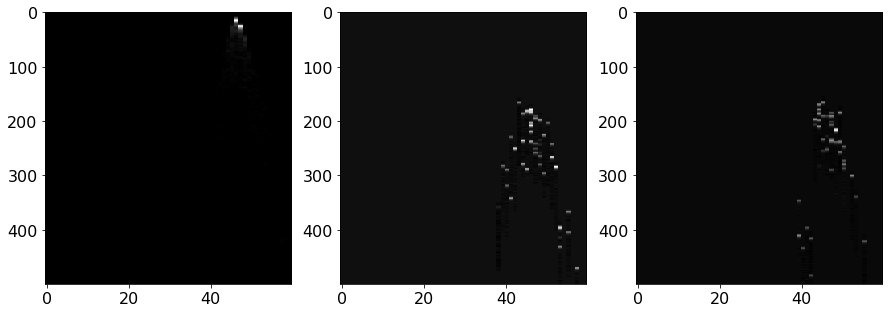

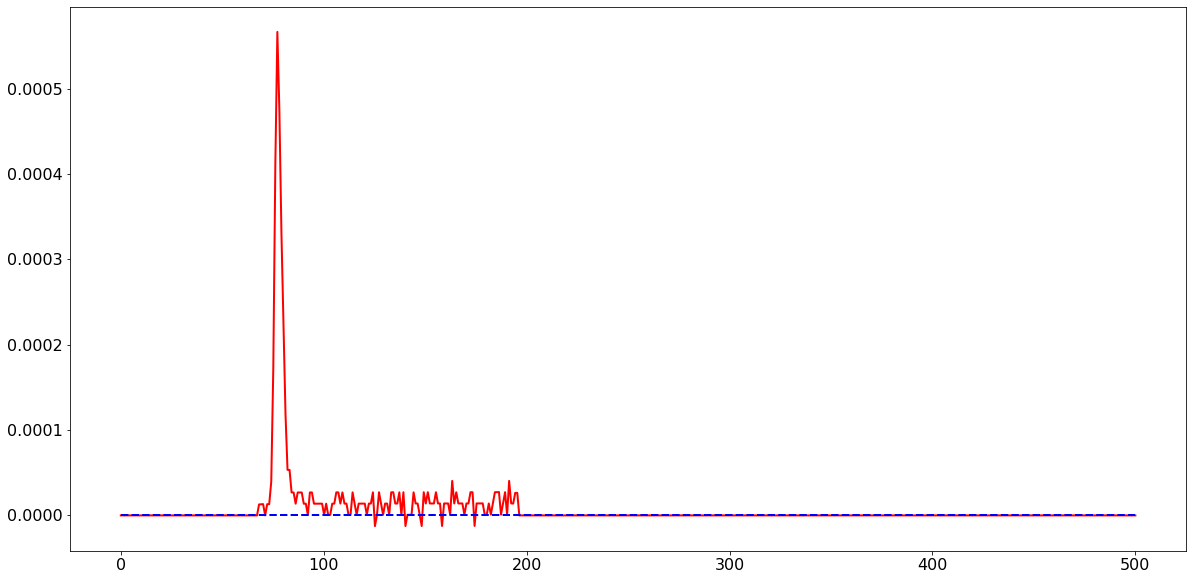

42
[1437.6778442     7.63730154] (16, 4294967295, 710, 0)
[1437.6778442     7.63730154] (16, 4294967295, 710, 0)


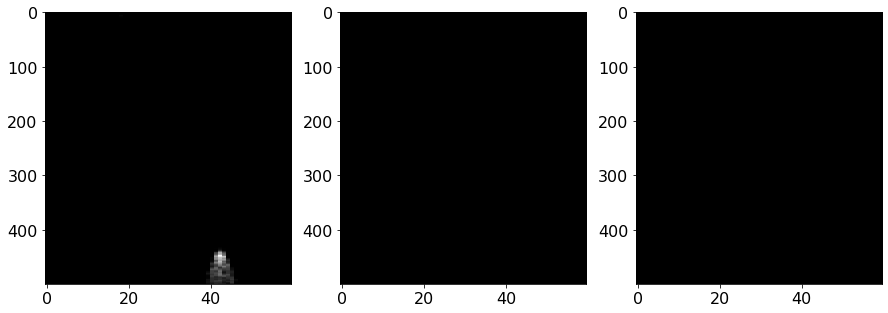

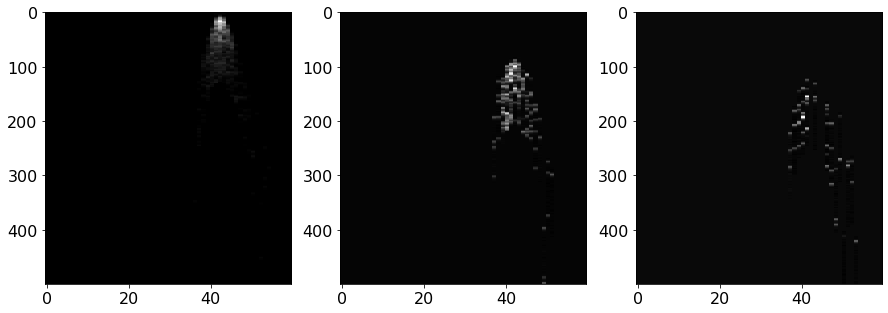

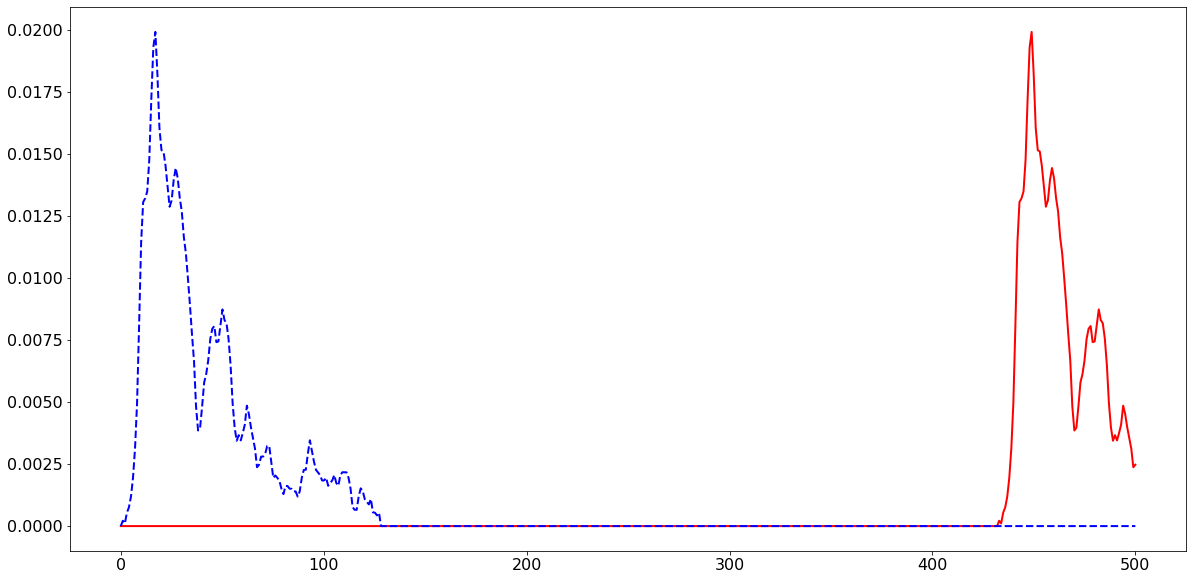

In [447]:
for n,i in enumerate(data_1[:1000]):
    it = (i[0]['id']["run_id"],i[0]['id']["sub_run_id"],i[0]['id']["event_id"],i[0]['id']["sub_event_id"])
    if it in set2:
        i2 = data_2[np.where(data_2["id"]==i["id"])]
        sums =[np.sum(i['image'][0,:,j,0]) for j in range(60)]
        max_dom = np.argmax(sums)
        print(max_dom)
        ims(i)
        diff_times1 = np.diff(i[0]['wf_times'][:,0][:3])
        diff_times2 = np.diff(i2[0]['wf_times'][:,0][:3])
        print(diff_times1,i[0]['id'])
        print(diff_times2,i2[0]['id'])
        
        #print(i[0]['wf_times'][:5],data_2[n]['wf_times'][0][:5])
        ims(i2)
        Plot(i['image'],i2['image'],max_dom,1)

In [555]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def MakeImg(i, title, x = 0.05,y =0.01):
    fig = plt.figure(figsize=(18, 5),facecolor='w')
    img =i['image'].copy()
    img_max = np.max(img)
    img[img<0] = 0
    img = img / img_max /1.1+ 0.01
    ax1 = fig.add_subplot(131)
    im1 = ax1.imshow(img[0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'afmhot',norm=mpl.colors.LogNorm(vmin= img.min(), vmax= img.max()))
    ax1.set_xlabel("DOM#", fontsize = 14)
    ax1.set_ylabel("Time, bins", fontsize = 14)
   # print(i['id']["run_id"],i['id']["sub_run_id"],i['id']["event_id"],i['id']["sub_event_id"])
    name = "ID={2:d} {3:d} {4:d} {5:d}\nNu Energy = {0:.0f} GeV\nQst={1:.0f} PE".format(i['primary']['energy'][0],i['qst']['q'][0][0],i['id']["run_id"][0],i['id']["sub_run_id"][0],i['id']["event_id"][0],i['id']["sub_event_id"][0])
    ax1.text(x,y, name, transform=ax1.transAxes, color = "white",fontsize=12)
    #im1.set_clim(0.01,1)
    #divider1 = make_axes_locatable(ax1)
    #cax1 = divider1.append_axes('right', size='5%', pad=0.05)
    #fig.colorbar(im1, cax=cax1, orientation='vertical')
    
    ax2 = fig.add_subplot(132)
    im2 = ax2.imshow(img[0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'afmhot',norm=mpl.colors.LogNorm(vmin= img.min(), vmax= img.max()))
    ax2.set_xlabel("DOM#", fontsize = 14)
    ax2.set_ylabel("Time, bins", fontsize = 14)
    name = "Qst={0:.0f} PE".format(i['qst']['q'][0][1])
    ax2.text(x,y, name, transform=ax2.transAxes, color = "white",fontsize=12)
    #im2.set_clim(0.01,1)
    #divider2 = make_axes_locatable(ax2)
    #cax2 = divider2.append_axes('right', size='5%', pad=0.05)
    #fig.colorbar(im2, cax=cax2, orientation='vertical')
    
    
    ax3 = fig.add_subplot(133)
    im3 = ax3.imshow(img[0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'afmhot',norm=mpl.colors.LogNorm(vmin= img.min(), vmax= img.max()))
    ax3.set_xlabel("DOM#", fontsize = 14)
    ax3.set_ylabel("Time, bins", fontsize = 14)
    name = "Qst={0:.0f} PE".format(i['qst']['q'][0][2])
    im3.set_clim(0.01,1)
    ax3.text(x,y, name, transform=ax3.transAxes, color = "white",fontsize=12)
    divider3 = make_axes_locatable(ax3)
    cax3 = divider3.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax3, orientation='vertical')
    
    #plt.title("Label = {0:.0f}, En = {1:.0f} GeV, Qt = {2:.0f} PE, Qs = {3:.0f} PE, i = {4}".format(nu_labels[i], nu_info[i][0],nu_info[i][1],nu_info[i][2],i))


/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


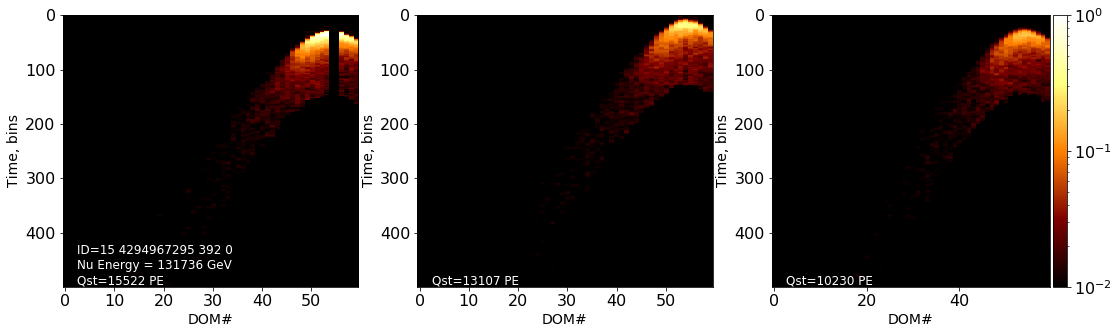

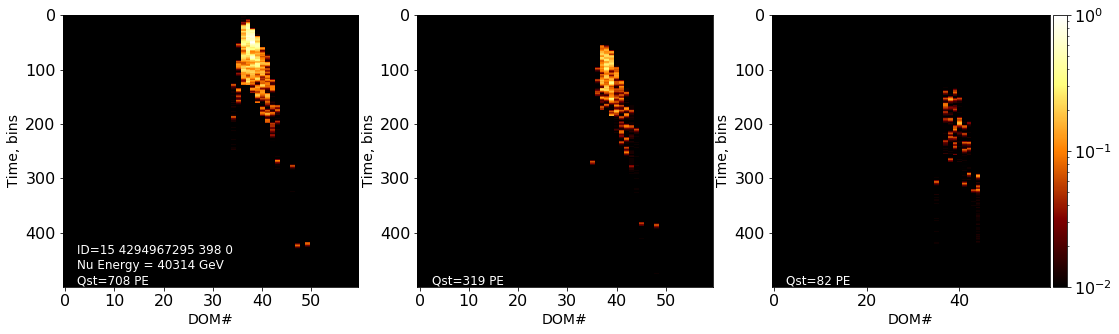

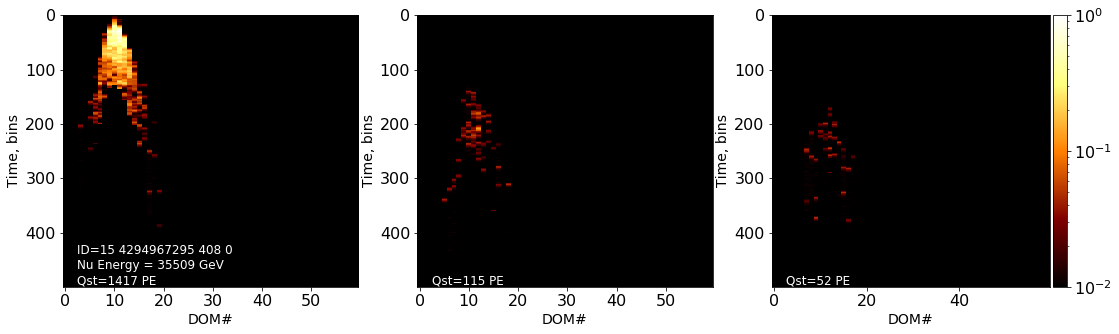

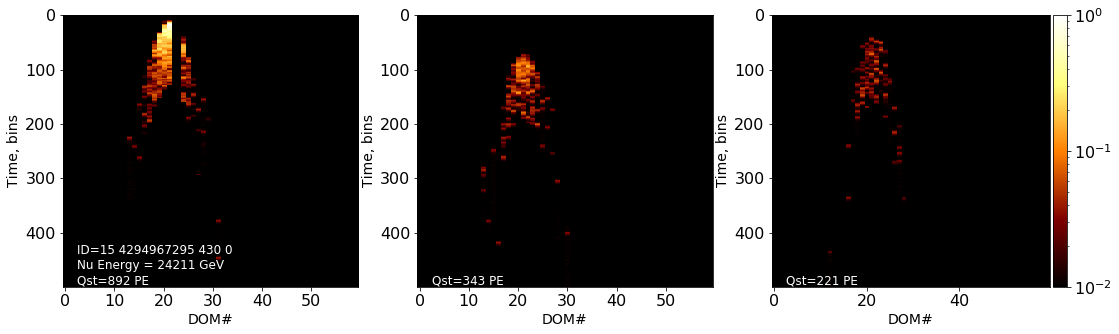

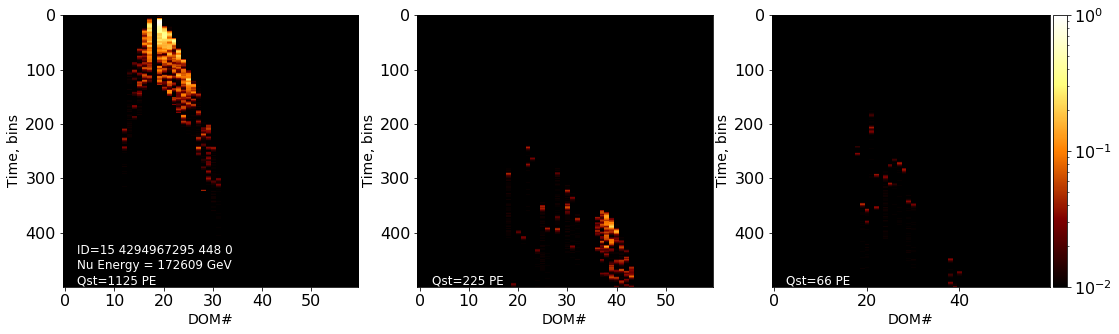

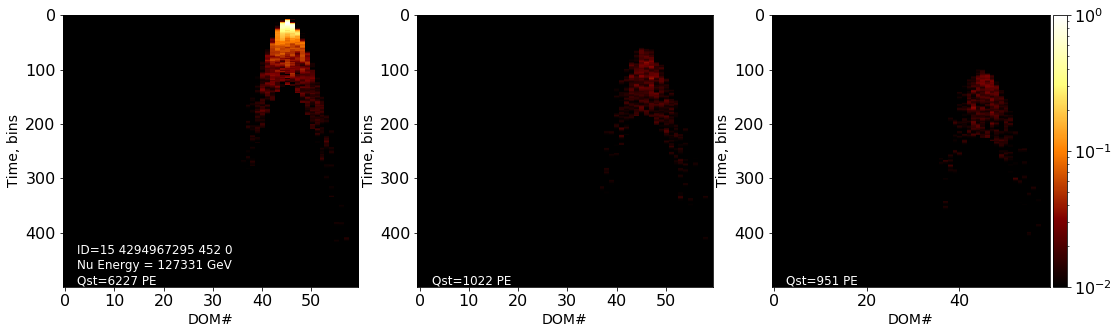

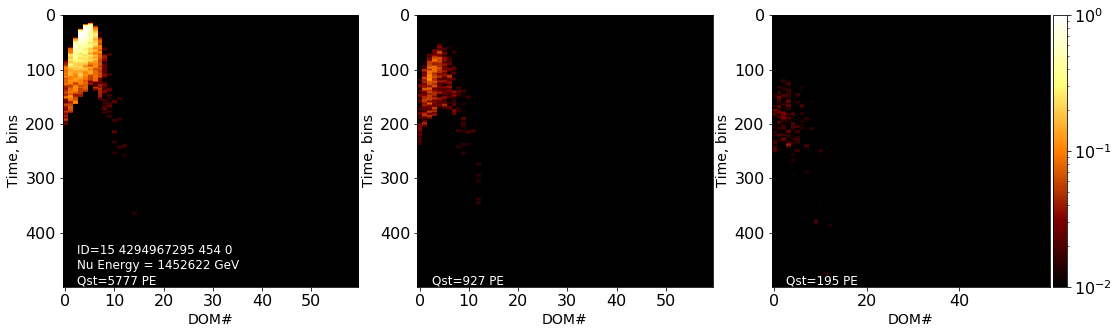

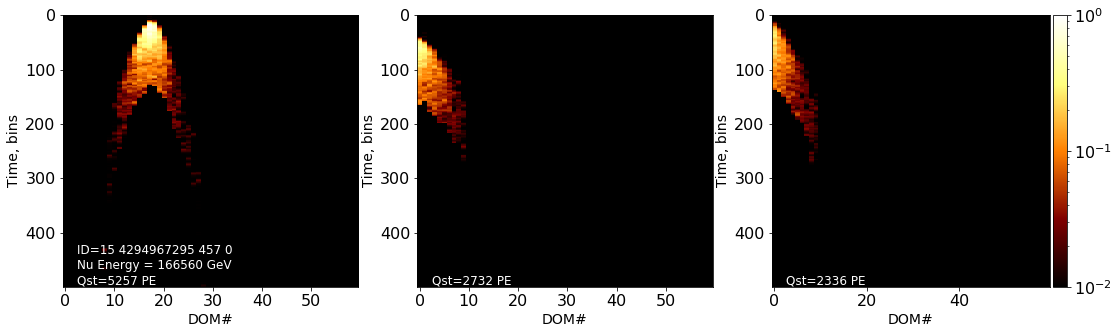

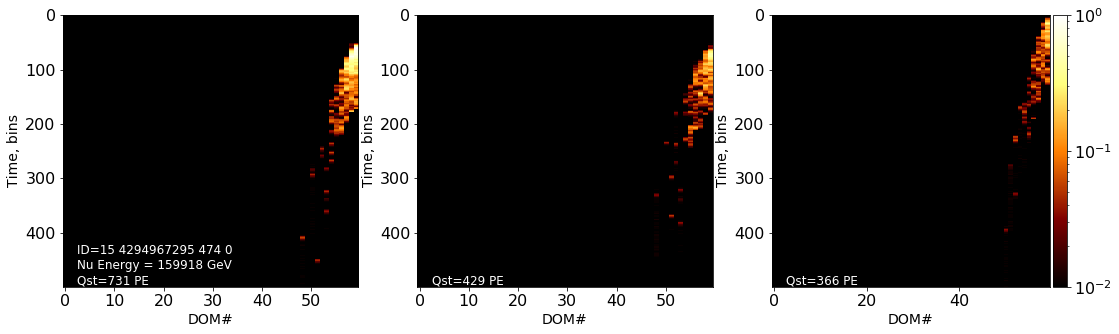

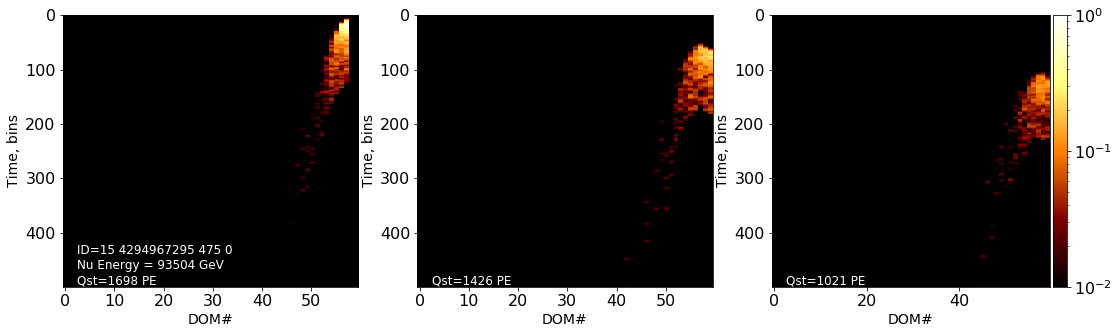

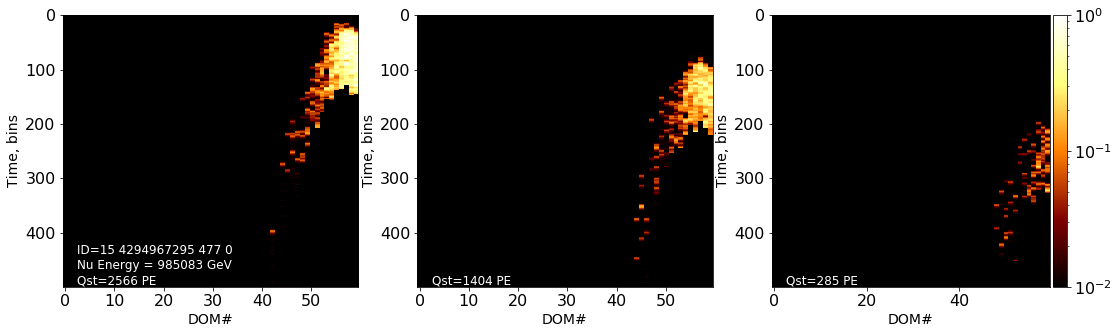

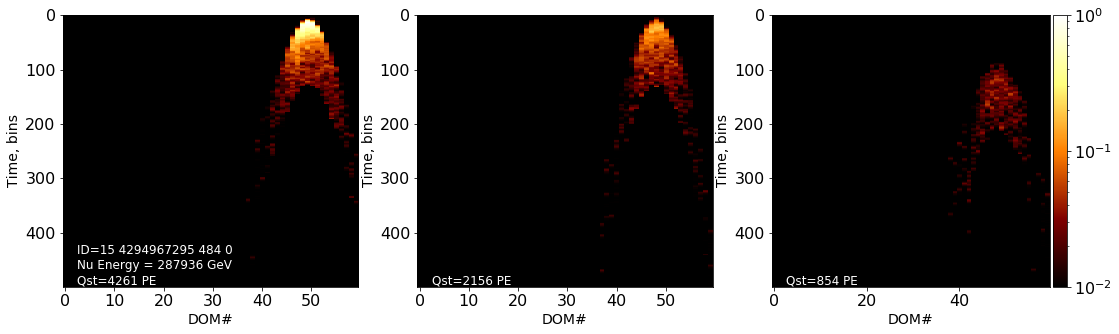

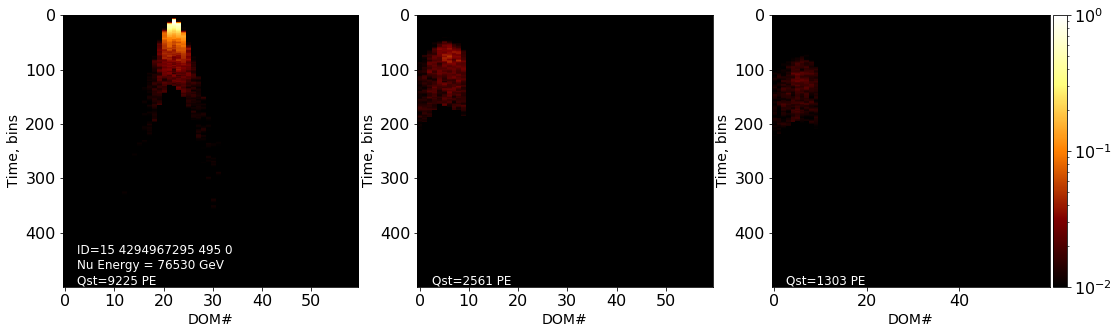

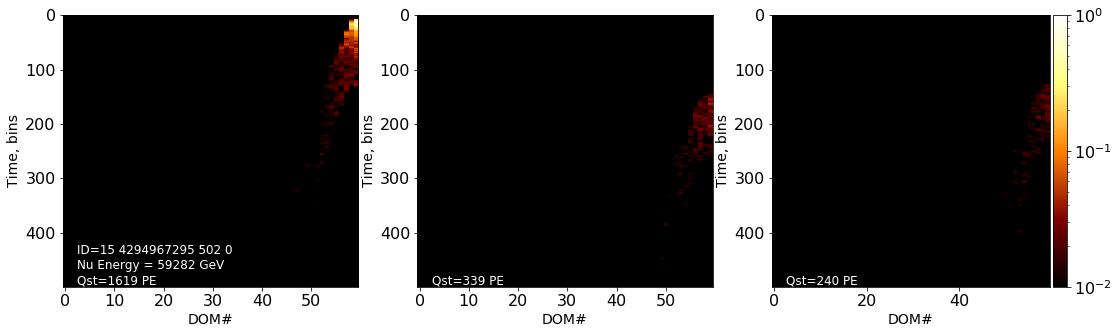

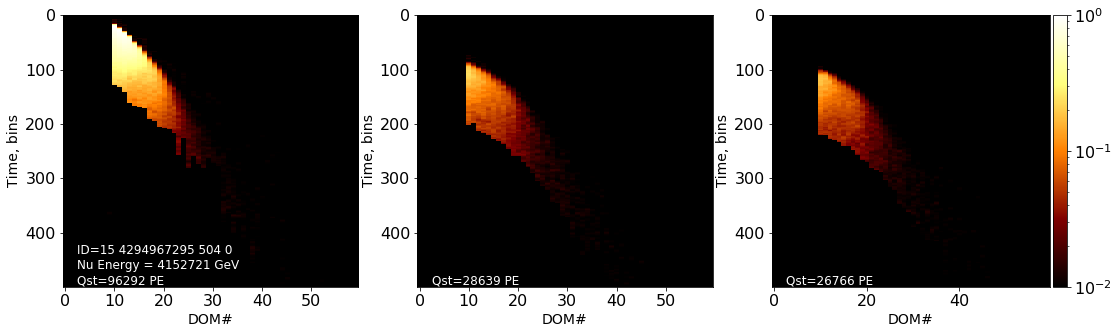

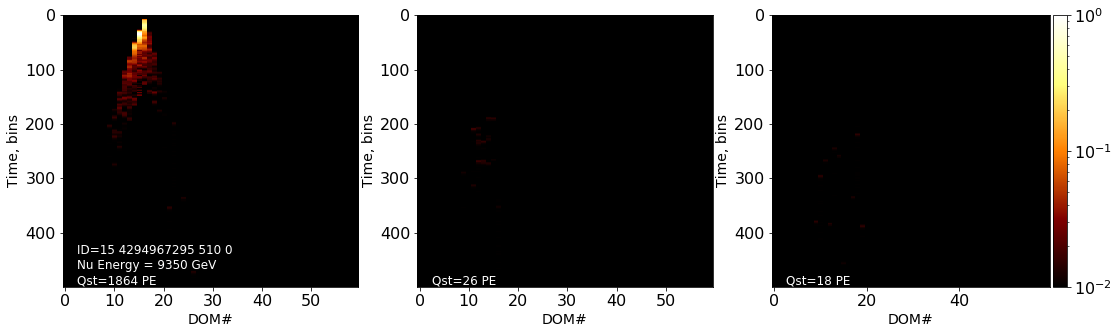

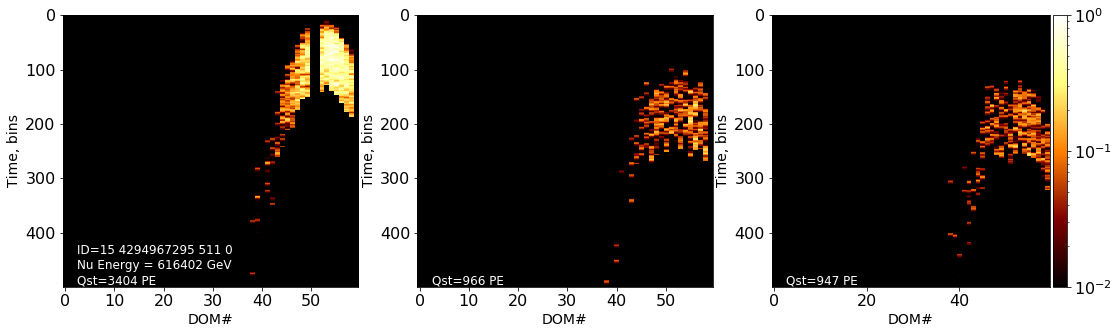

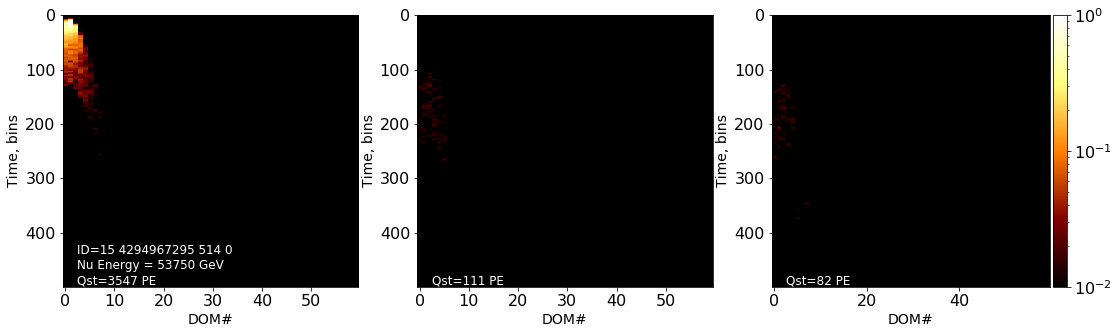

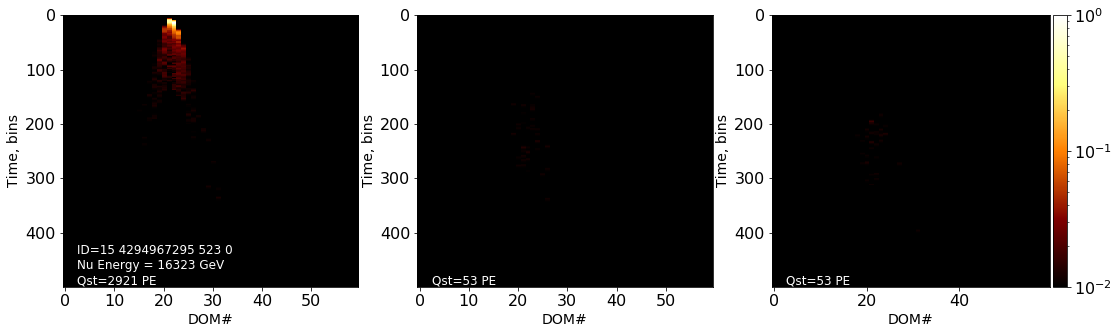

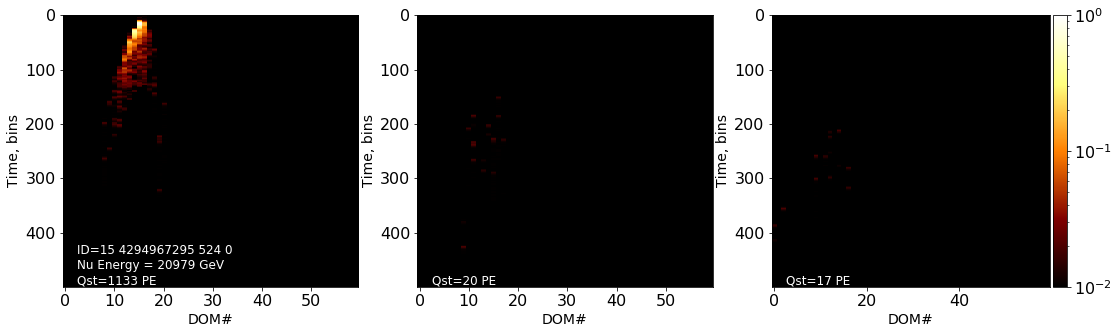

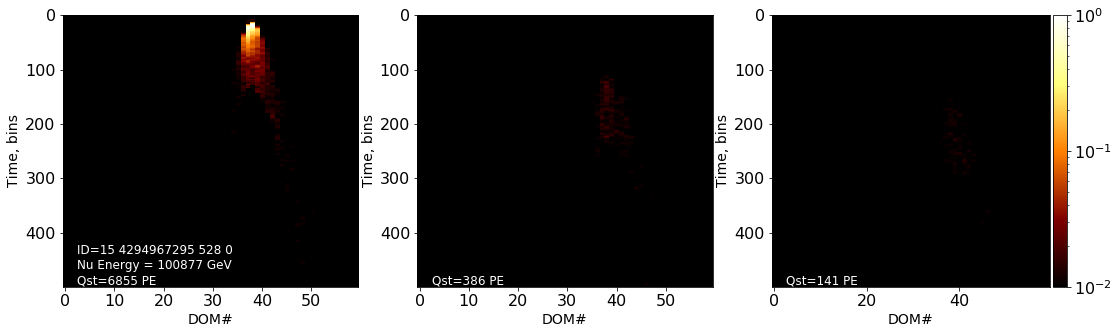

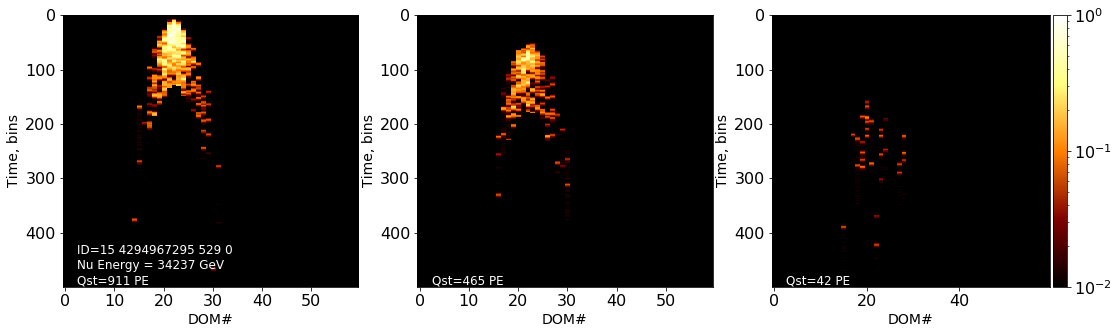

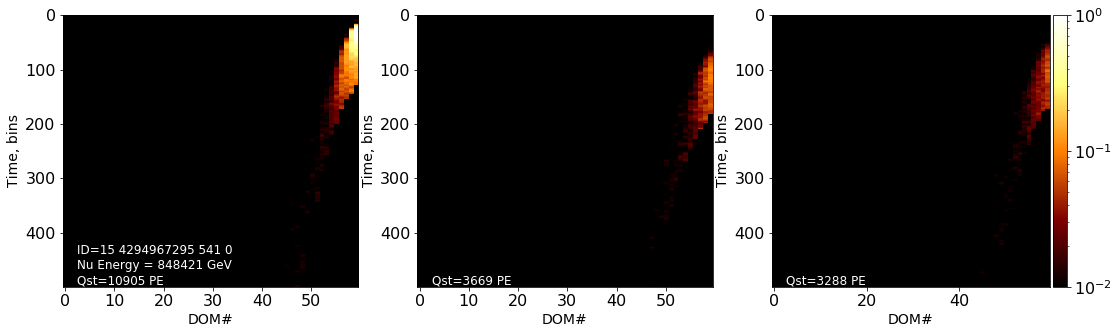

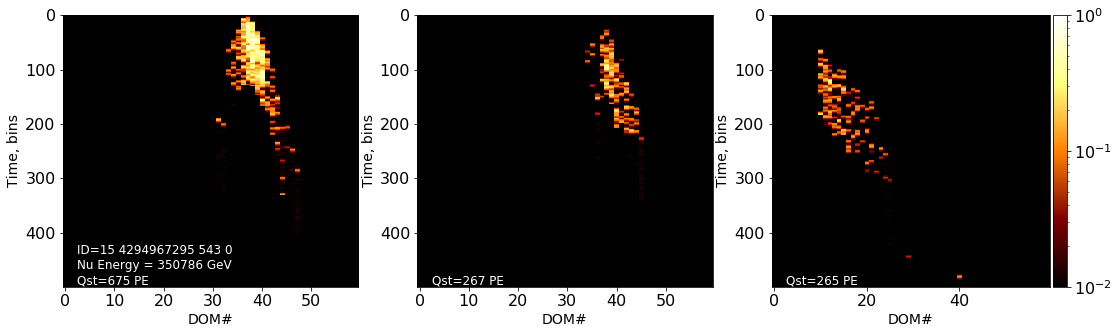

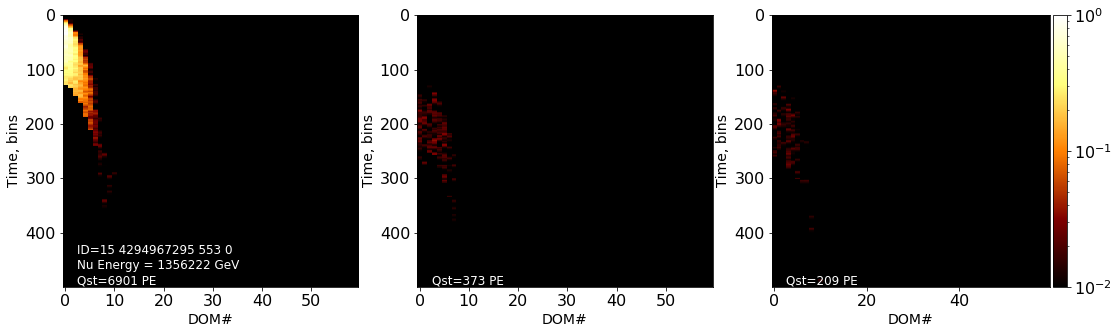

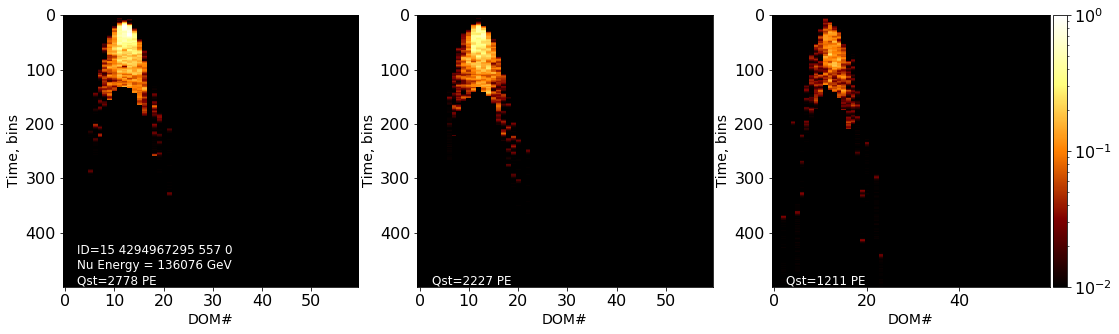

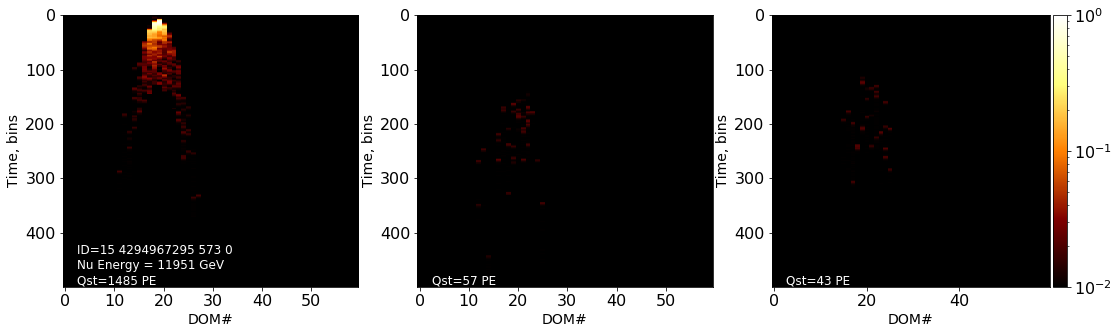

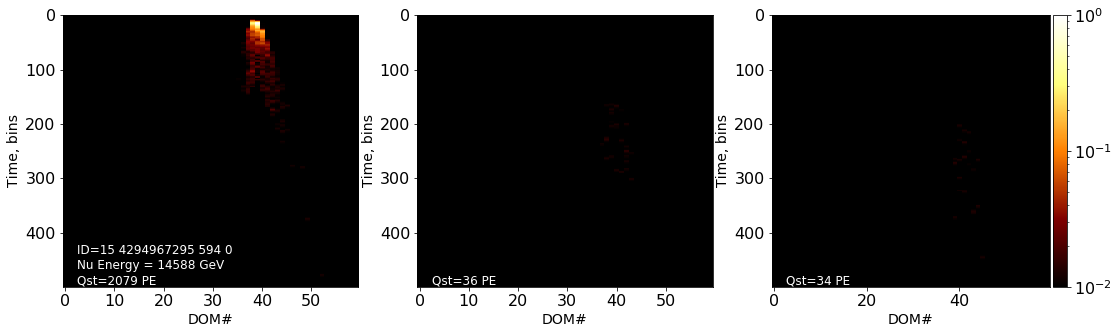

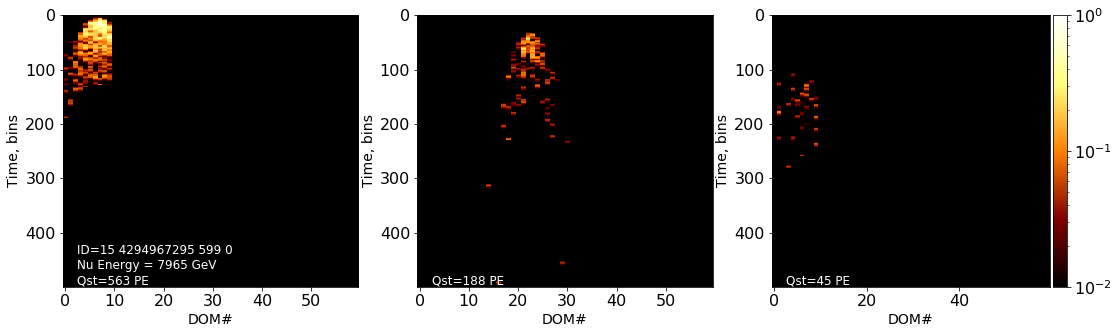

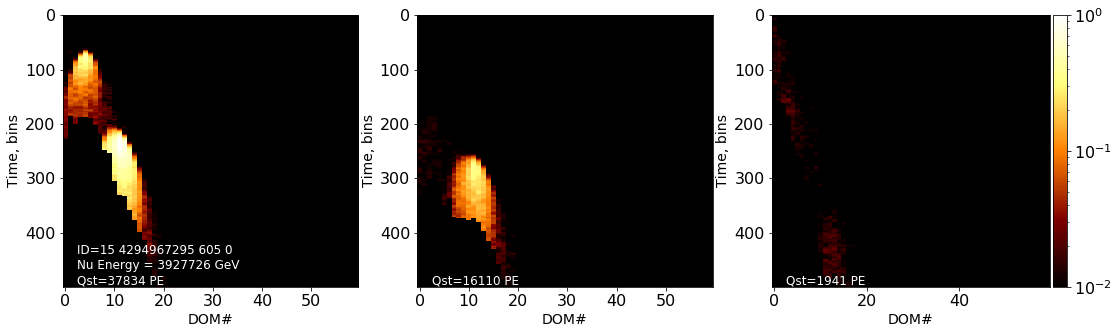

In [556]:
for n,i in enumerate(data_1[60:90]):
    #i2 = data_2[np.where(data_2["id"]==i["id"])]
    MakeImg(i,"a")
#    MakeImg(i2,'2')
   